# Tree Methods
When it comes to machine learning classification algorithms, tree based methods tend to be among the most powerful.  Not only do they tend to produce very accurate models, but they are quite easy to interpret.  You can think of each branch of the decision tree representing a question, the answer to which tells you which direction to move.  This is akin to medical diagnosis -- if white blood cell count is larger than x, then...

Tree methods do not come without their shortfalls however as they are quite susceptible to overfitting.  In this exercise, we'll first take a look at a single decision tree, and then expand the concept more broadly to an ensemble of trees.

## Decision Trees
Our basic building block here is going to be the decision tree.  As discussed above, decision trees are somewhat modeled after the way a doctor diagnoses a disease in a patient.  This leads to a model that is both easy to interpret and tends to perform well.  In this exercise, we'll take a look at the Breast Cancer data set and fit a decision tree model.

1 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Breast Cancer Wisconsin](http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.

In [1]:
import pandas as pd
import numpy as np

### Attribute List

1. Sample code number
2. Clump Thickness
3. Uniformity of Cell Size
4. Uniformity of Cell Shape
5. Marginal Adhesion
6. Single Epithelial Cell Size
7. Bare Nuclei
8. Bland Chromatin
9. Normal Nucleoli
10. Mitoses
11. Class (2 for benign, 4 for malignant)

In [2]:
bcw = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',
                 header=None)
bcw.columns = ['id', 'thickness', 'cell_size', 'cell_shape', 'adhesion', 'single_cell_size',
               'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

In [3]:
bcw.head()

,id,thickness,cell_size,cell_shape,adhesion,single_cell_size,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
bcw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                  699 non-null int64
thickness           699 non-null int64
cell_size           699 non-null int64
cell_shape          699 non-null int64
adhesion            699 non-null int64
single_cell_size    699 non-null int64
bare_nuclei         699 non-null object
chromatin           699 non-null int64
normal_nucleoli     699 non-null int64
mitoses             699 non-null int64
class               699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
bcw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
thickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
cell_size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
cell_shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
single_cell_size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
chromatin,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
normal_nucleoli,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


There are some non numerical values in the `bare_nuclei` column, let's take a look and fix them:

In [6]:
print(bcw.bare_nuclei.unique())
bcw.bare_nuclei = bcw.bare_nuclei.apply(lambda x: int(x) if x != '?' else np.nan)

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


Let's also look at how the two classes are distributed:

In [7]:
bcw['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

Finally we drop the rows with nas and split the data in train and test:

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
bcw = bcw.dropna()
bcw_train, bcw_test, bcw_target_train, bcw_target_test = train_test_split(bcw.drop(['id', 'class'], axis=1), bcw.loc[:, 'class'], test_size=0.3, random_state=57)

2 - Fit a decision tree model to the data, using the default `sklearn` parameters, and report the training and testing accuracies.  What is the most important feature?  Comment on your results.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
treeClass = DecisionTreeClassifier(random_state=59)
treeClass.fit(bcw_train, bcw_target_train)
print(treeClass.score(bcw_train, bcw_target_train))
print(treeClass.score(bcw_test, bcw_target_test))

1.0
0.946341463415


In [12]:
print(bcw_train.columns)
print(treeClass.feature_importances_)

Index(['thickness', 'cell_size', 'cell_shape', 'adhesion', 'single_cell_size',
       'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses'],
      dtype='object')
[ 0.03857663  0.76442362  0.0095702   0.01262001  0.00410603  0.1096927
  0.00458909  0.04689664  0.00952508]


The most important feature is cell size. We can observe that the decision tree has a perfect training score but it is overfitting the data since the precision drops to 94.6% for the test set; nonetheless the accuracy of the model is very good.

3 - Now try different values of the `max_features` parameter and report the training and testing errors.  Comment on your results.

In [13]:
for n_features in np.arange(1, 10):
    treeClass.set_params(max_features=n_features)
    treeClass.fit(bcw_train, bcw_target_train)
    print('Training accuracy for {} features: {}'.format(n_features, treeClass.score(bcw_train, bcw_target_train)))
    print('Testing accuracy for {} features: {}'.format(n_features, treeClass.score(bcw_test, bcw_target_test)))
    # print(treeClass.feature_importances_)
    print('\n')

Training accuracy for 1 features: 1.0
Testing accuracy for 1 features: 0.9219512195121952


Training accuracy for 2 features: 1.0
Testing accuracy for 2 features: 0.9463414634146341


Training accuracy for 3 features: 1.0
Testing accuracy for 3 features: 0.926829268292683


Training accuracy for 4 features: 1.0
Testing accuracy for 4 features: 0.926829268292683


Training accuracy for 5 features: 1.0
Testing accuracy for 5 features: 0.9560975609756097


Training accuracy for 6 features: 1.0
Testing accuracy for 6 features: 0.9414634146341463


Training accuracy for 7 features: 1.0
Testing accuracy for 7 features: 0.9707317073170731


Training accuracy for 8 features: 1.0
Testing accuracy for 8 features: 0.9463414634146341


Training accuracy for 9 features: 1.0
Testing accuracy for 9 features: 0.9463414634146341




For all the possibilities we always get 100% accuracy on the training set, while the testing score is always over 92% and it goes up and down with the number of features.

4 - Now try different settings for the `min_samples_split` parameter.  Comment on your results.

In [14]:
treeClass = DecisionTreeClassifier(random_state=59)

for min_samples in np.arange(50, 700, 50):
    treeClass.set_params(min_samples_split=min_samples)
    treeClass.fit(bcw_train, bcw_target_train)
    print('Training accuracy for {} samples: {}'.format(min_samples, treeClass.score(bcw_train, bcw_target_train)))
    print('Testing accuracy for {} samples: {}'.format(min_samples, treeClass.score(bcw_test, bcw_target_test)))
    print('\n')

Training accuracy for 50 samples: 0.9686192468619247
Testing accuracy for 50 samples: 0.9609756097560975


Training accuracy for 100 samples: 0.9686192468619247
Testing accuracy for 100 samples: 0.9609756097560975


Training accuracy for 150 samples: 0.9686192468619247
Testing accuracy for 150 samples: 0.9609756097560975


Training accuracy for 200 samples: 0.9686192468619247
Testing accuracy for 200 samples: 0.9609756097560975


Training accuracy for 250 samples: 0.9686192468619247
Testing accuracy for 250 samples: 0.9609756097560975


Training accuracy for 300 samples: 0.9686192468619247
Testing accuracy for 300 samples: 0.9609756097560975


Training accuracy for 350 samples: 0.9393305439330544
Testing accuracy for 350 samples: 0.9073170731707317


Training accuracy for 400 samples: 0.9393305439330544
Testing accuracy for 400 samples: 0.9073170731707317


Training accuracy for 450 samples: 0.9393305439330544
Testing accuracy for 450 samples: 0.9073170731707317


Training accuracy for

With this settings we lower the overfitting and we get better overall performances for values under 300, while the score starts to get worst and worst over this number. For values between 50 and 300 the scores are the same, so I'll try smaller values (since the default is 2):

In [15]:
for min_samples in np.arange(2, 20, 1):
    treeClass.set_params(min_samples_split=min_samples)
    treeClass.fit(bcw_train, bcw_target_train)
    print('Training accuracy for {} samples: {}'.format(min_samples, treeClass.score(bcw_train, bcw_target_train)))
    print('Testing accuracy for {} samples: {}'.format(min_samples, treeClass.score(bcw_test, bcw_target_test)))
    print('\n')

Training accuracy for 2 samples: 1.0
Testing accuracy for 2 samples: 0.9463414634146341


Training accuracy for 3 samples: 0.99581589958159
Testing accuracy for 3 samples: 0.9317073170731708


Training accuracy for 4 samples: 0.9937238493723849
Testing accuracy for 4 samples: 0.9463414634146341


Training accuracy for 5 samples: 0.9937238493723849
Testing accuracy for 5 samples: 0.9463414634146341


Training accuracy for 6 samples: 0.9937238493723849
Testing accuracy for 6 samples: 0.9463414634146341


Training accuracy for 7 samples: 0.9916317991631799
Testing accuracy for 7 samples: 0.9463414634146341


Training accuracy for 8 samples: 0.9916317991631799
Testing accuracy for 8 samples: 0.9463414634146341


Training accuracy for 9 samples: 0.9895397489539749
Testing accuracy for 9 samples: 0.9463414634146341


Training accuracy for 10 samples: 0.9895397489539749
Testing accuracy for 10 samples: 0.9463414634146341


Training accuracy for 11 samples: 0.9853556485355649
Testing accuracy 

By increasing the `min_samples_split` parameter we lower the overfitting and, by the time we get over 15, the performances are slightly better than that of the default value.

5 - Using the models you build in part (4), and taking into consideration what you found in part (3), print out the a graphical representation of the tree for each.  Comment on your results.

In [17]:
from sklearn.tree import export_graphviz

for min_samples in np.arange(2, 20, 1):
    treeClass.set_params(min_samples_split=min_samples)
    treeClass.fit(bcw_train, bcw_target_train)
    file = 'dots/tree_{}samples.dot'.format(min_samples)
    export_graphviz(treeClass,
                    out_file=file,
                    feature_names=['thickness', 'cell_size', 'cell_shape', 'adhesion', 'single_cell_size', 'bare_nuclei', 'chromatin' ,'normal_nucleoli', 'mitoses'])

I execute the batch `ìcreateGraph.bat` to transform the dot files in images.

min_split_samples=2


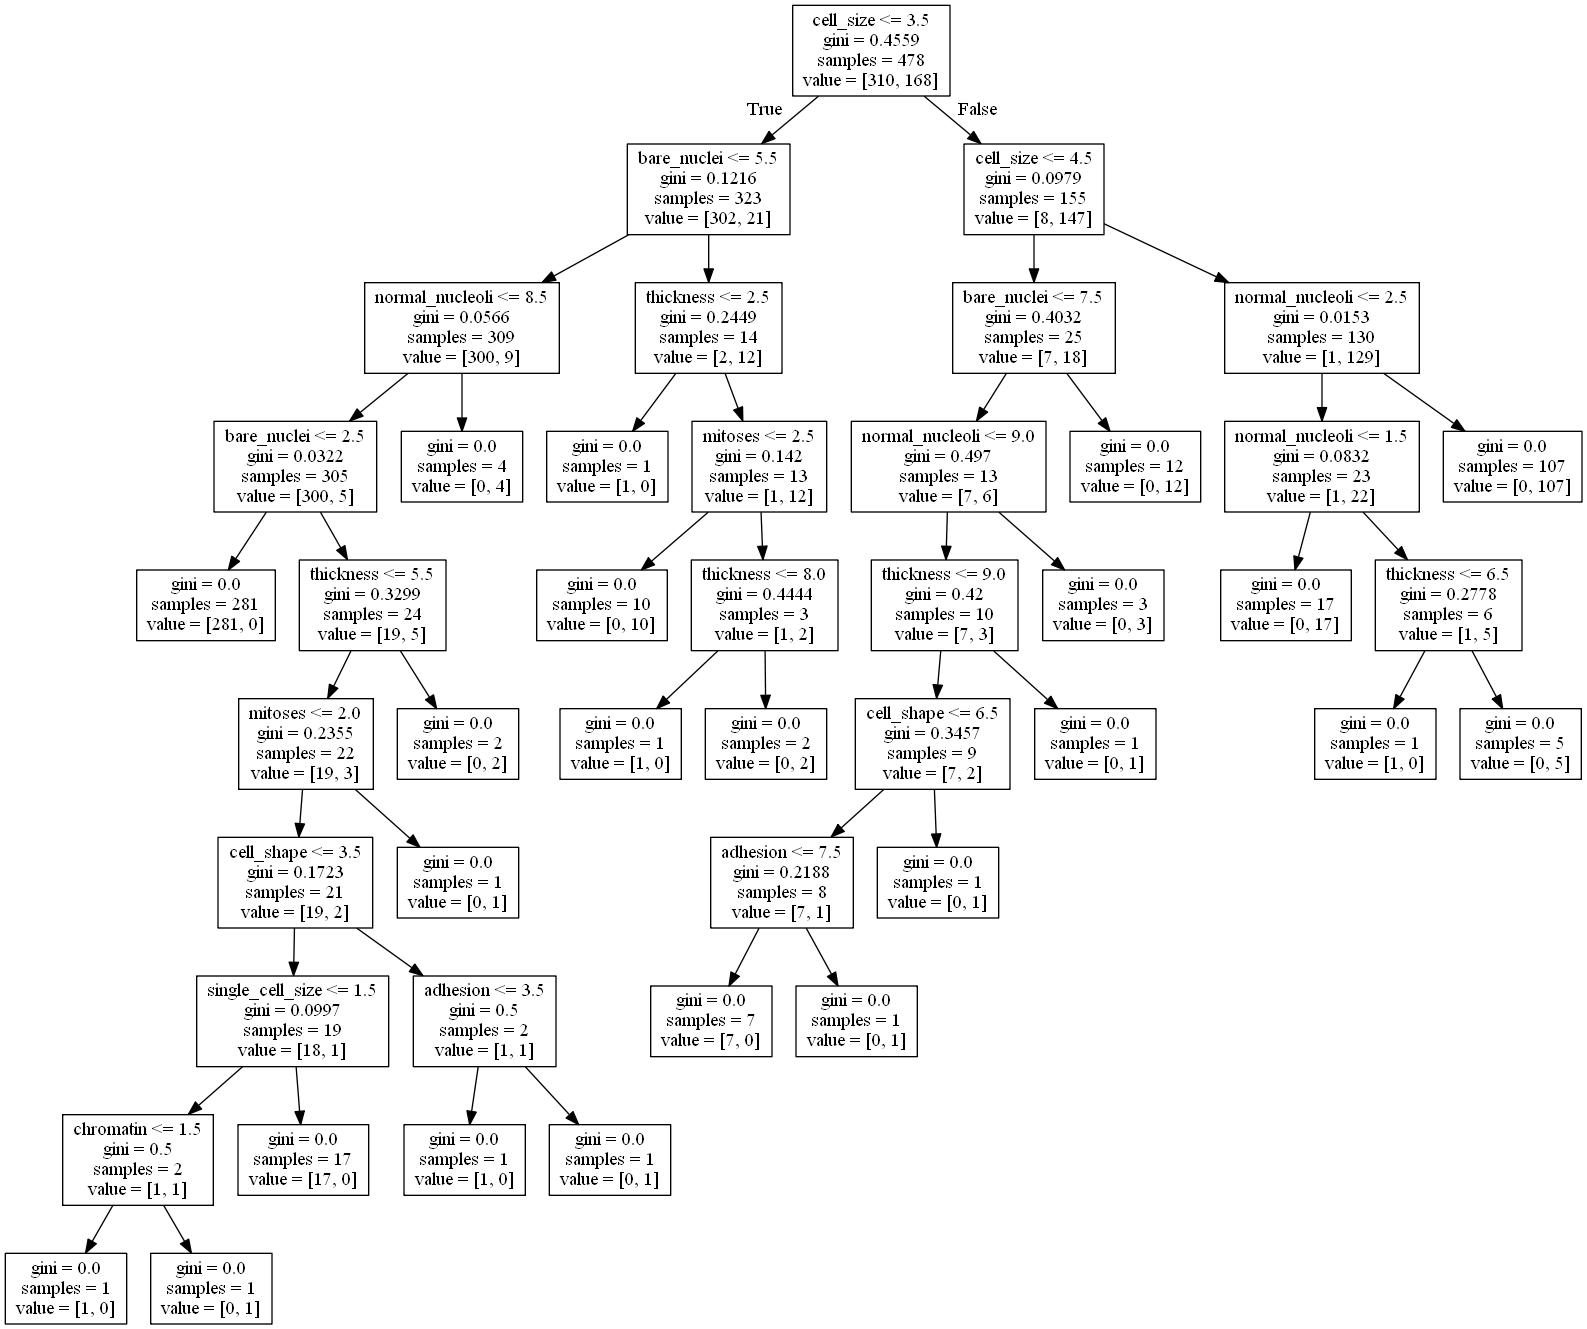

min_split_samples=3


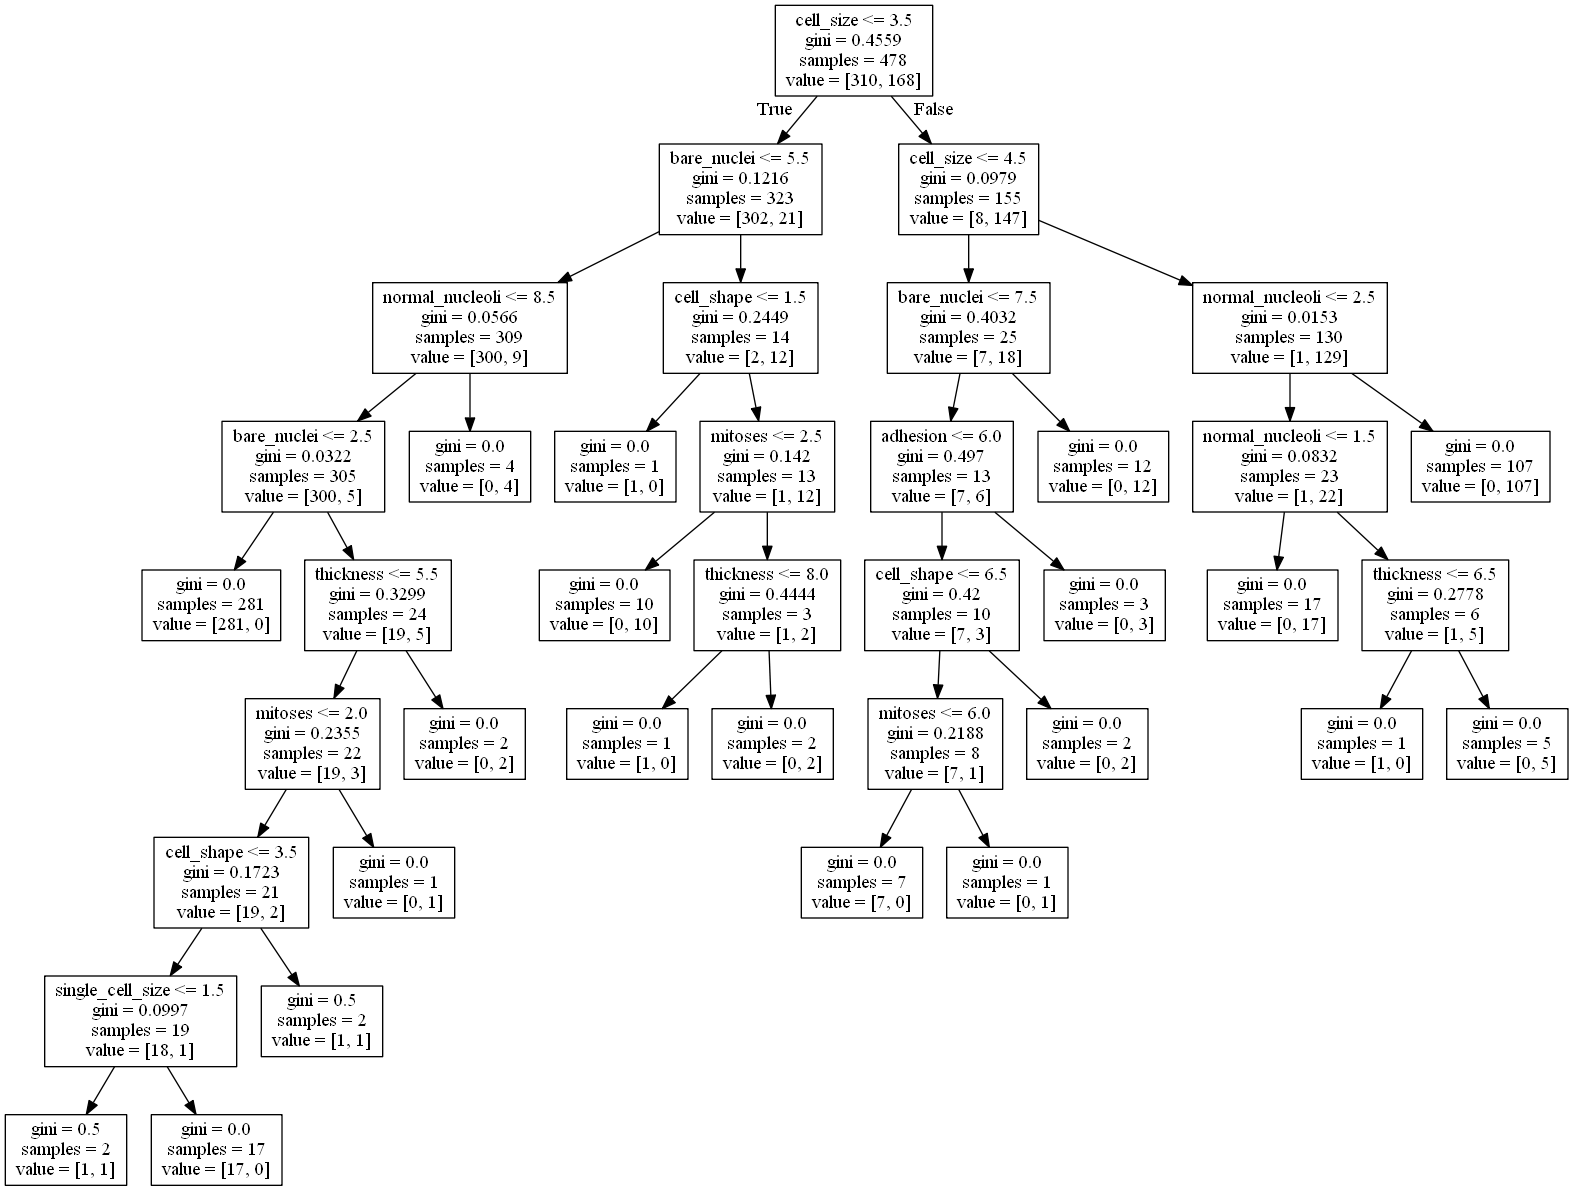

min_split_samples=4


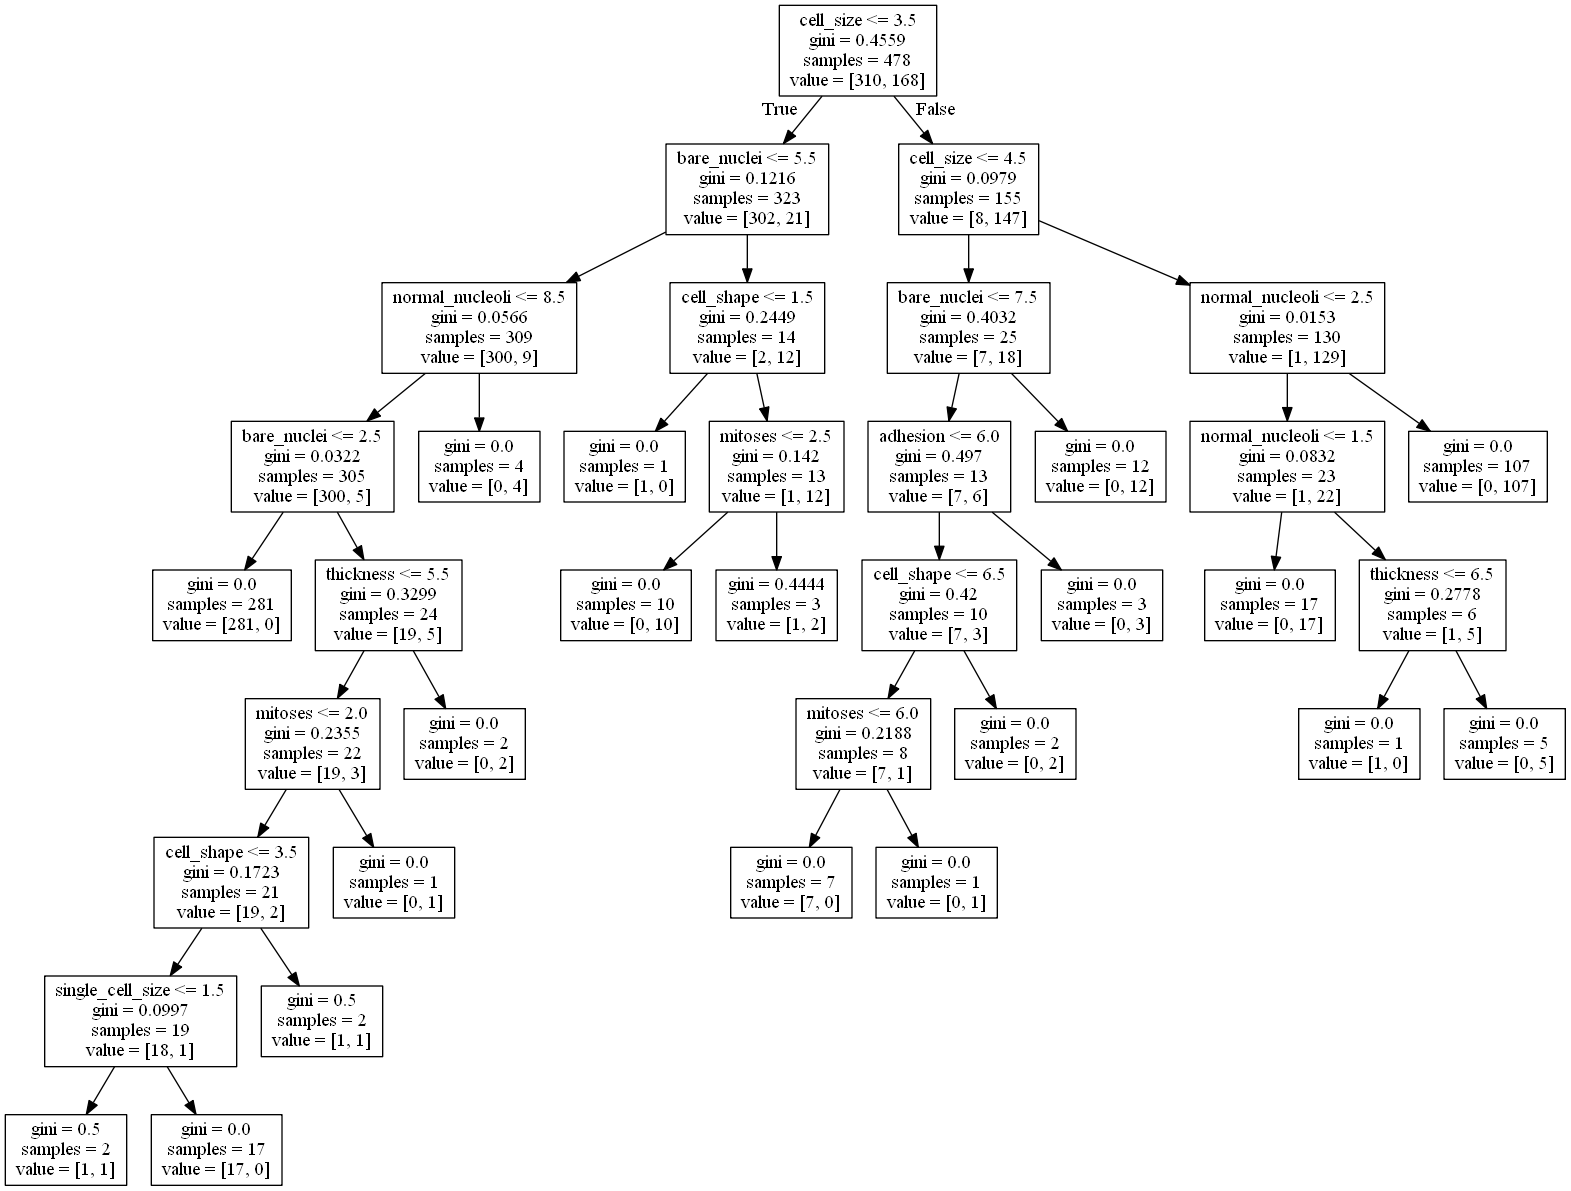

min_split_samples=5


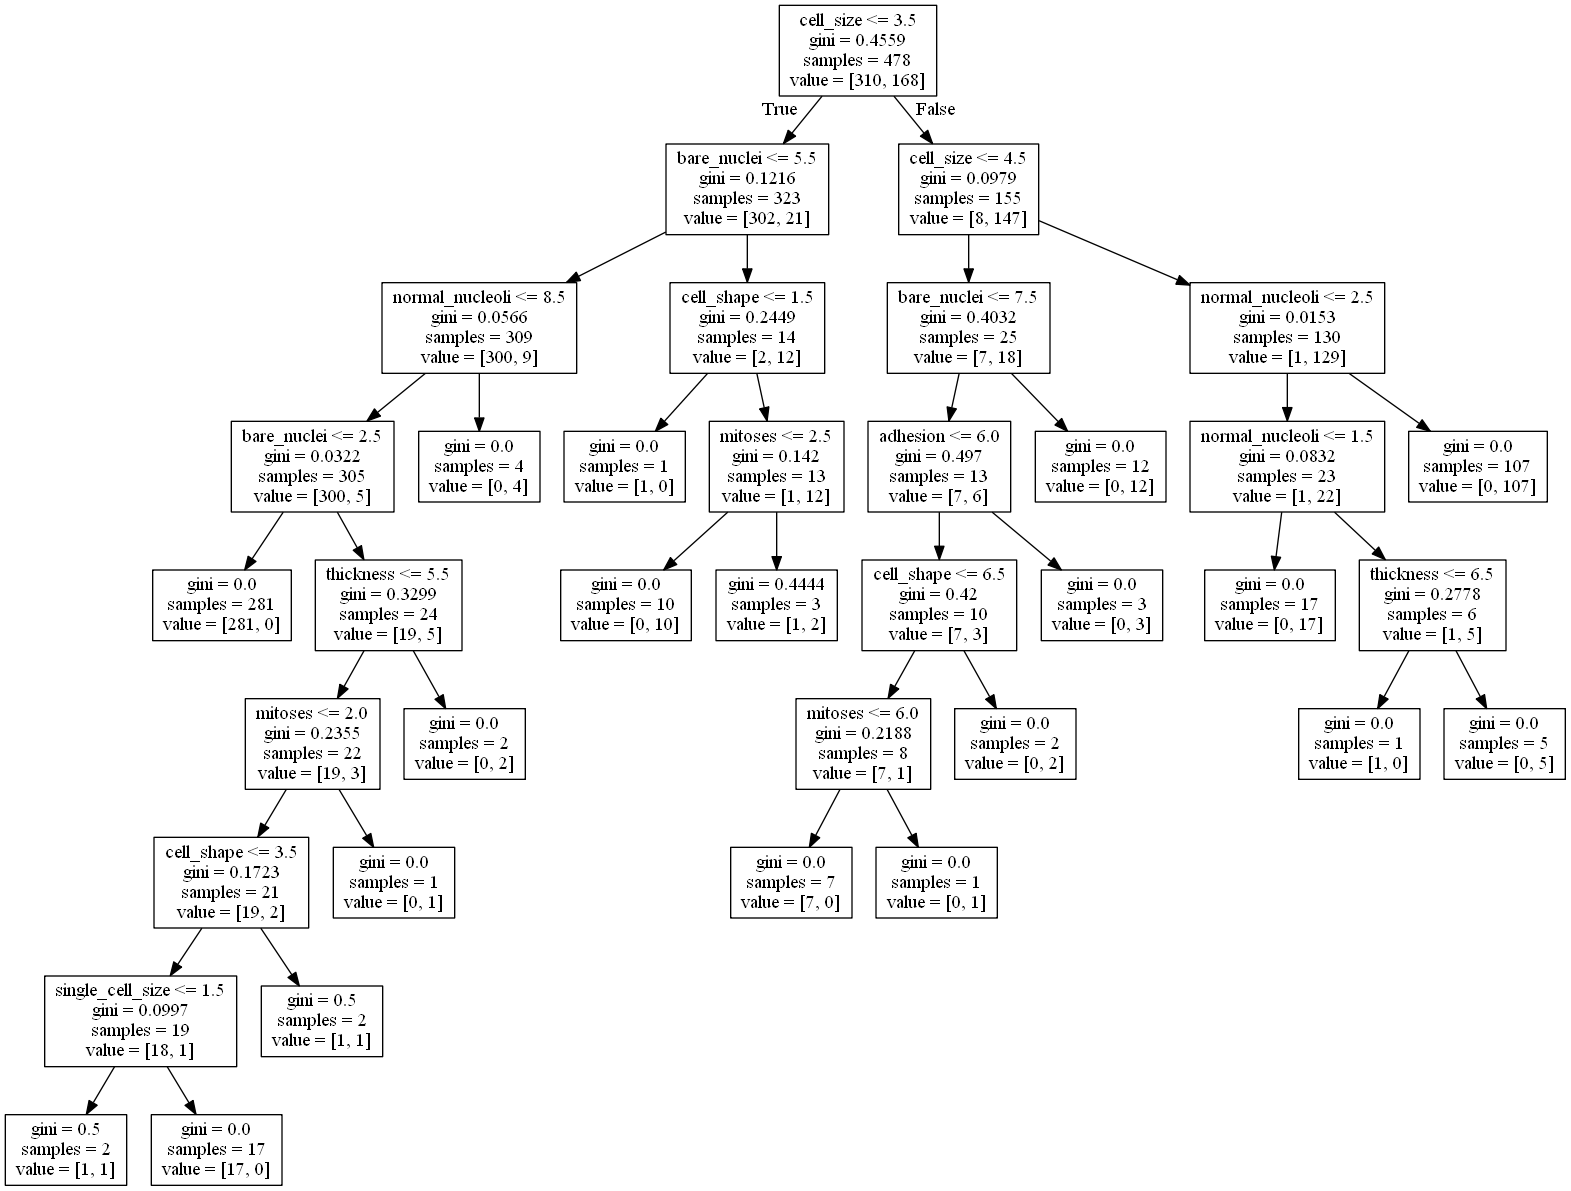

min_split_samples=6


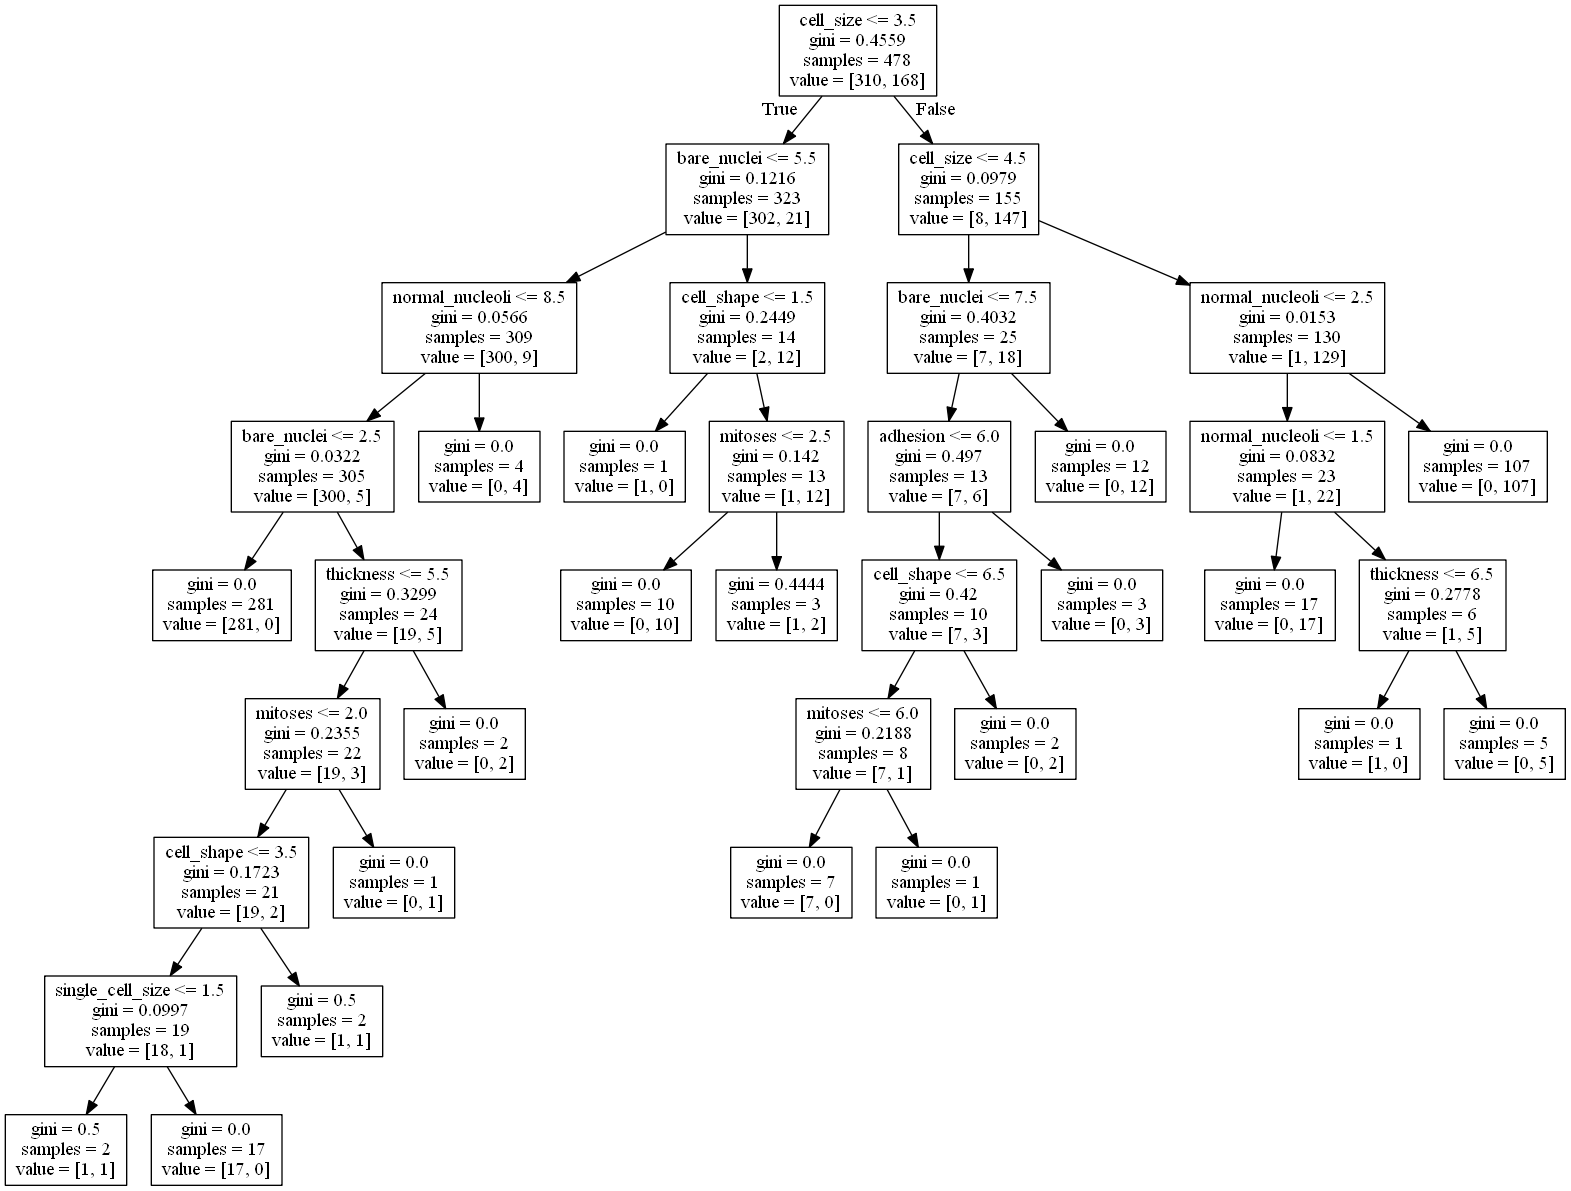

min_split_samples=7


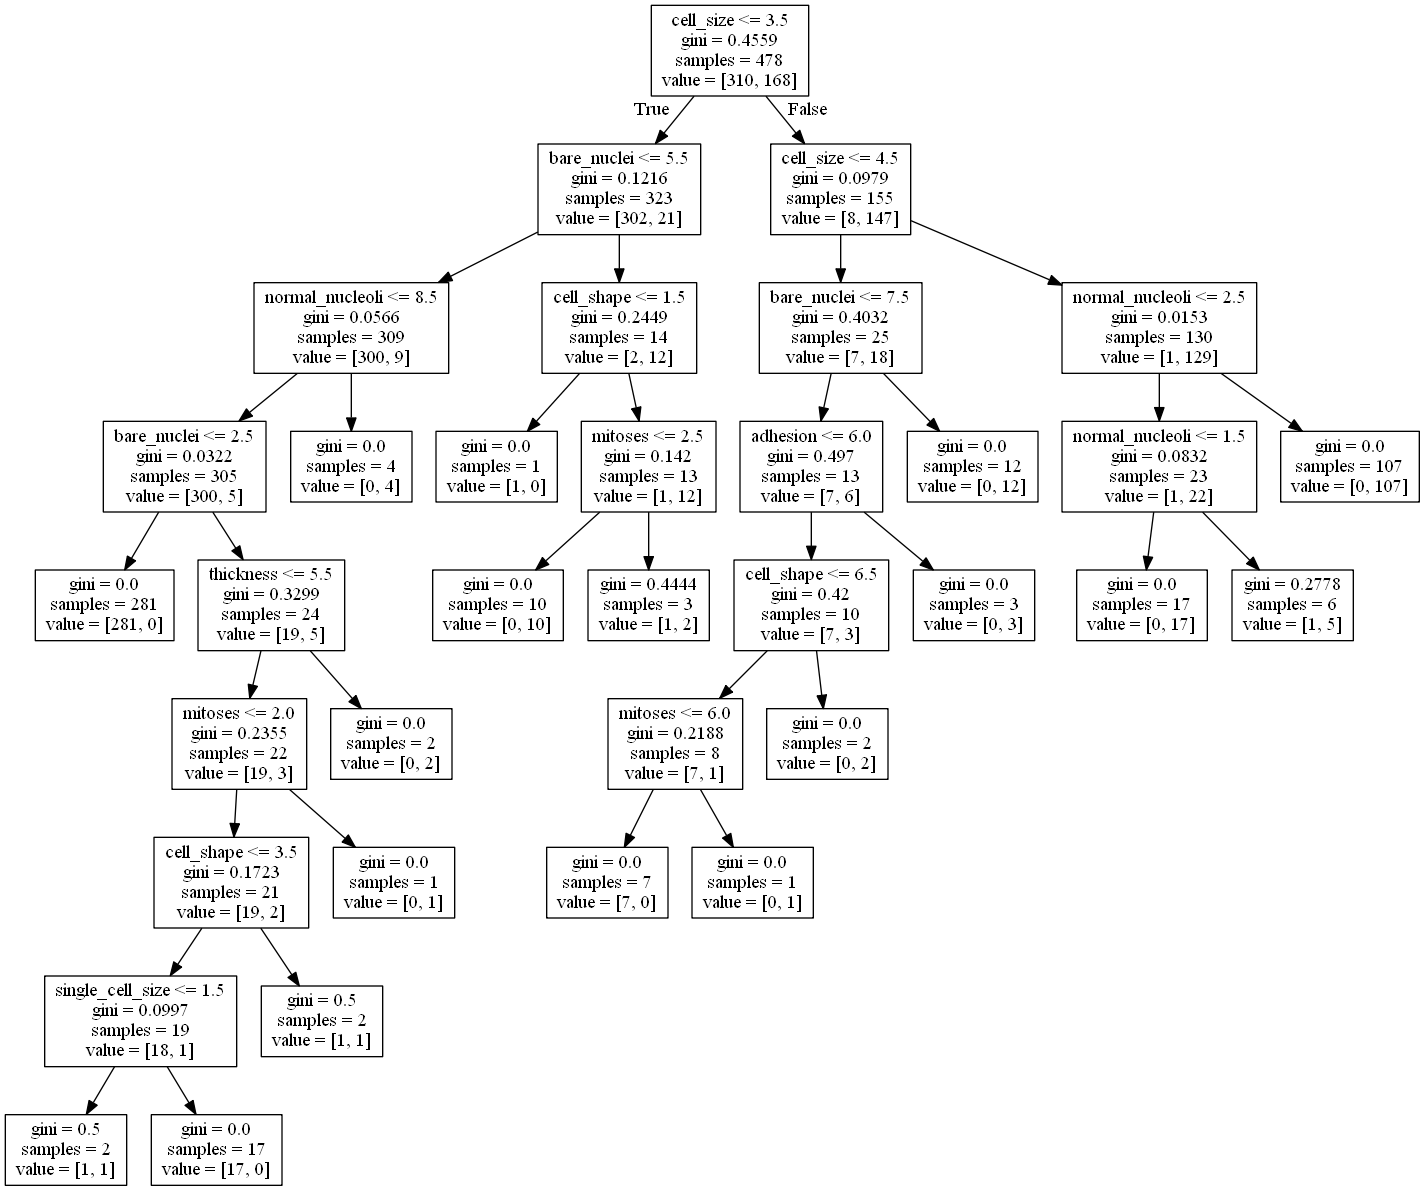

min_split_samples=8


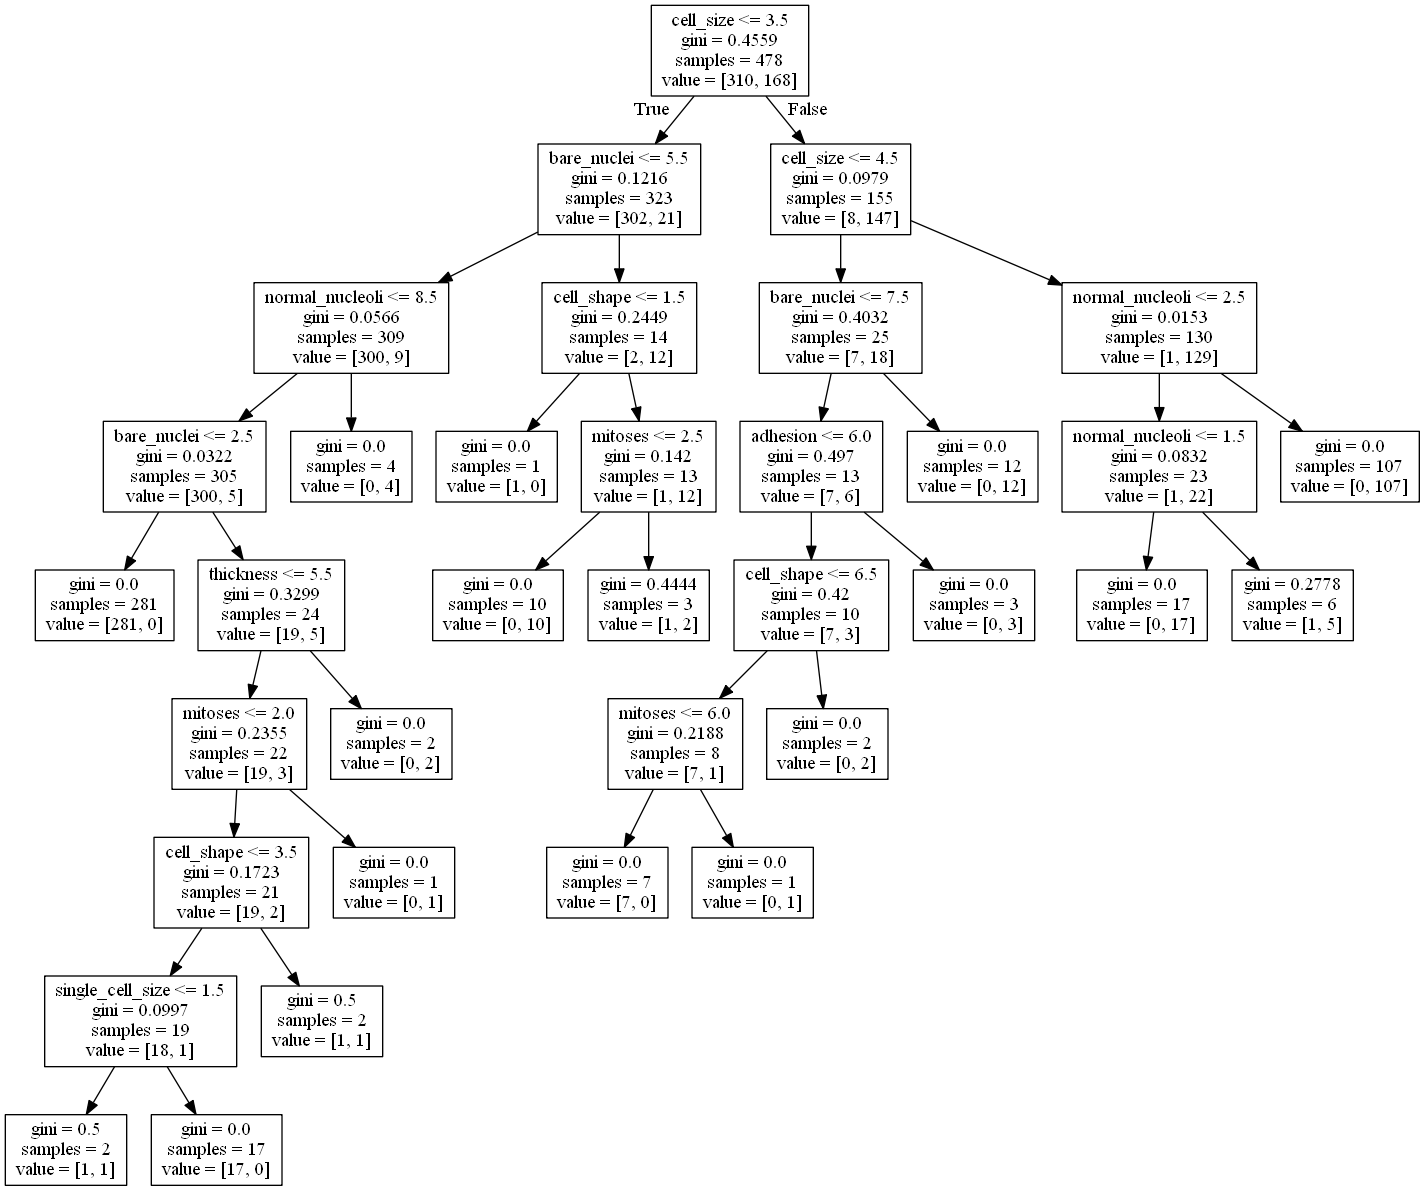

min_split_samples=9


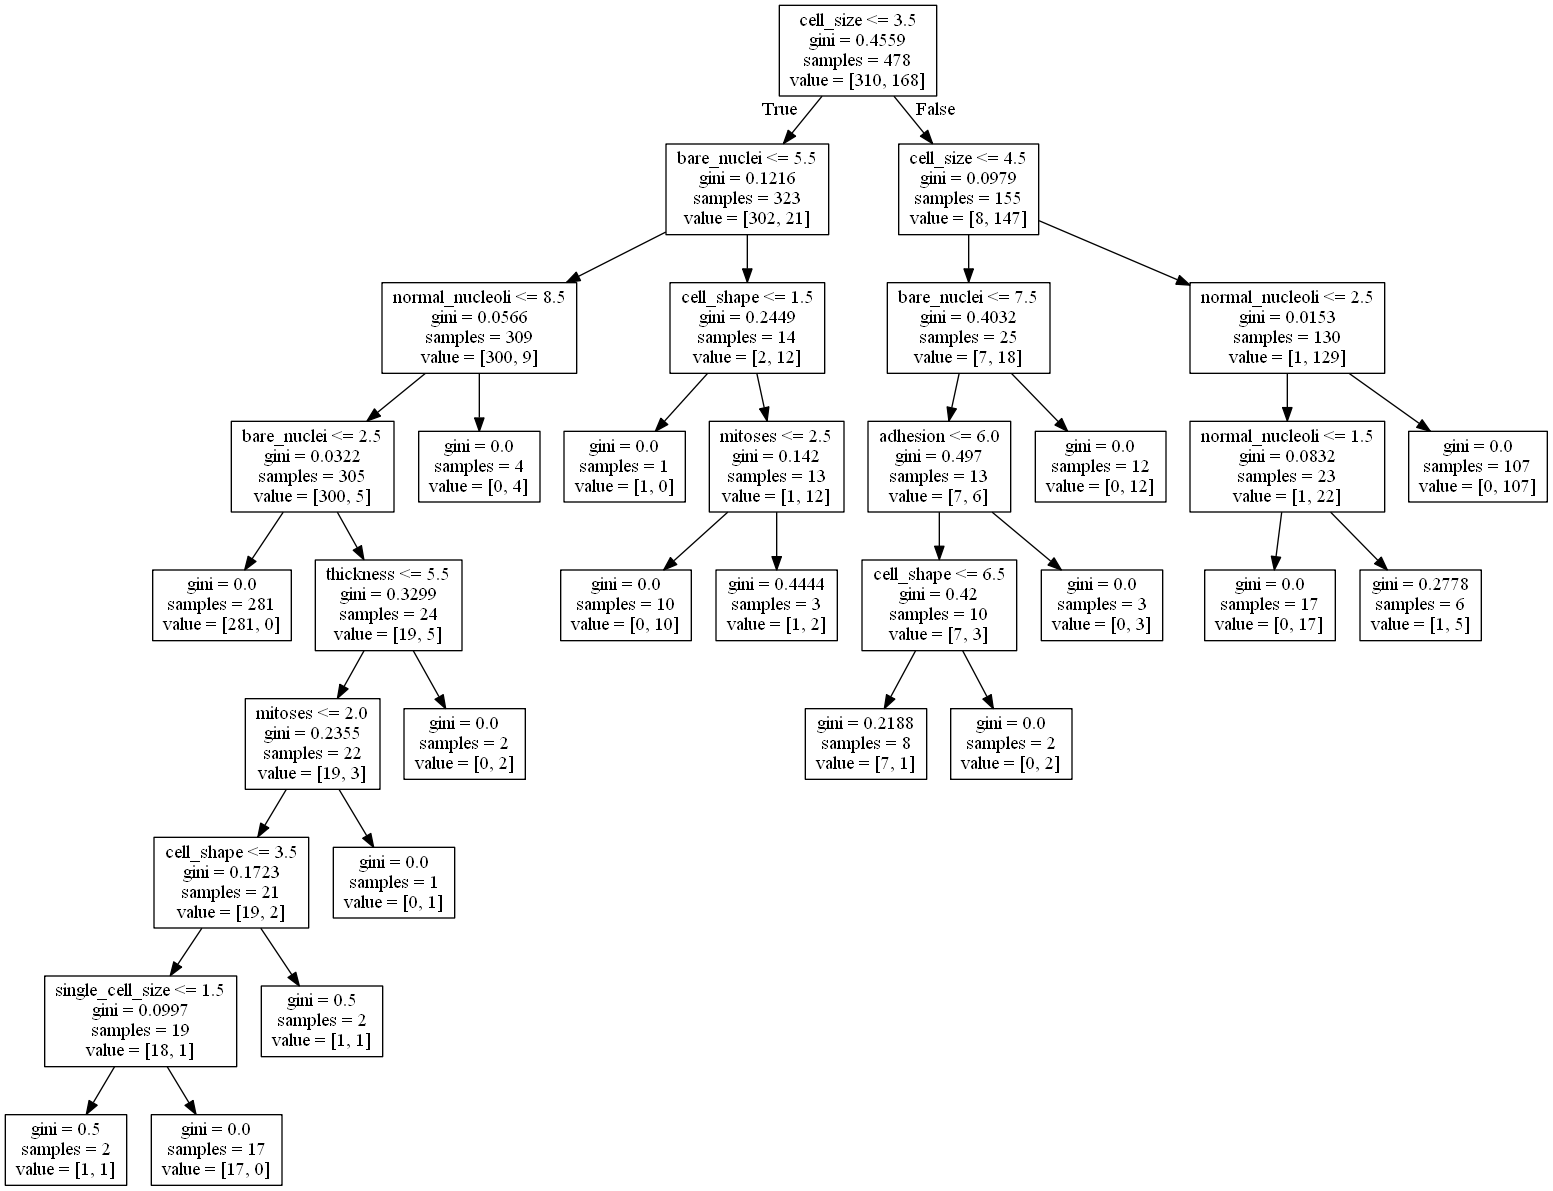

min_split_samples=10


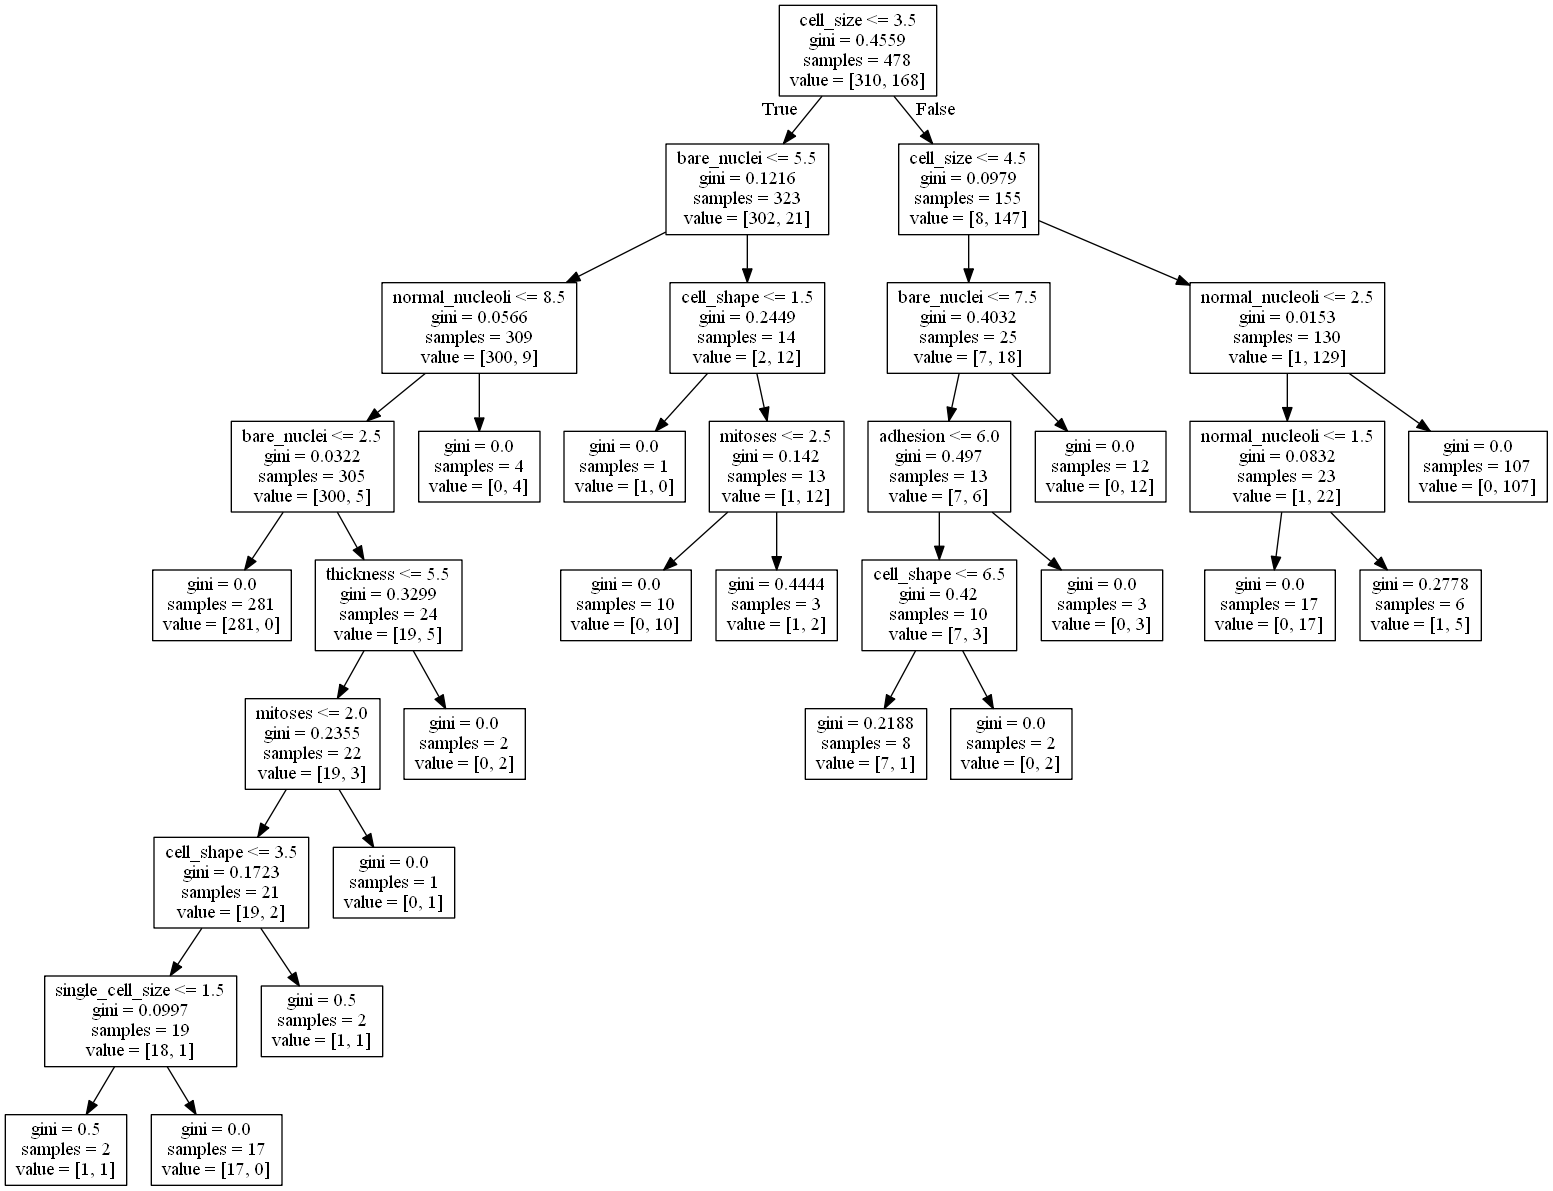

min_split_samples=11


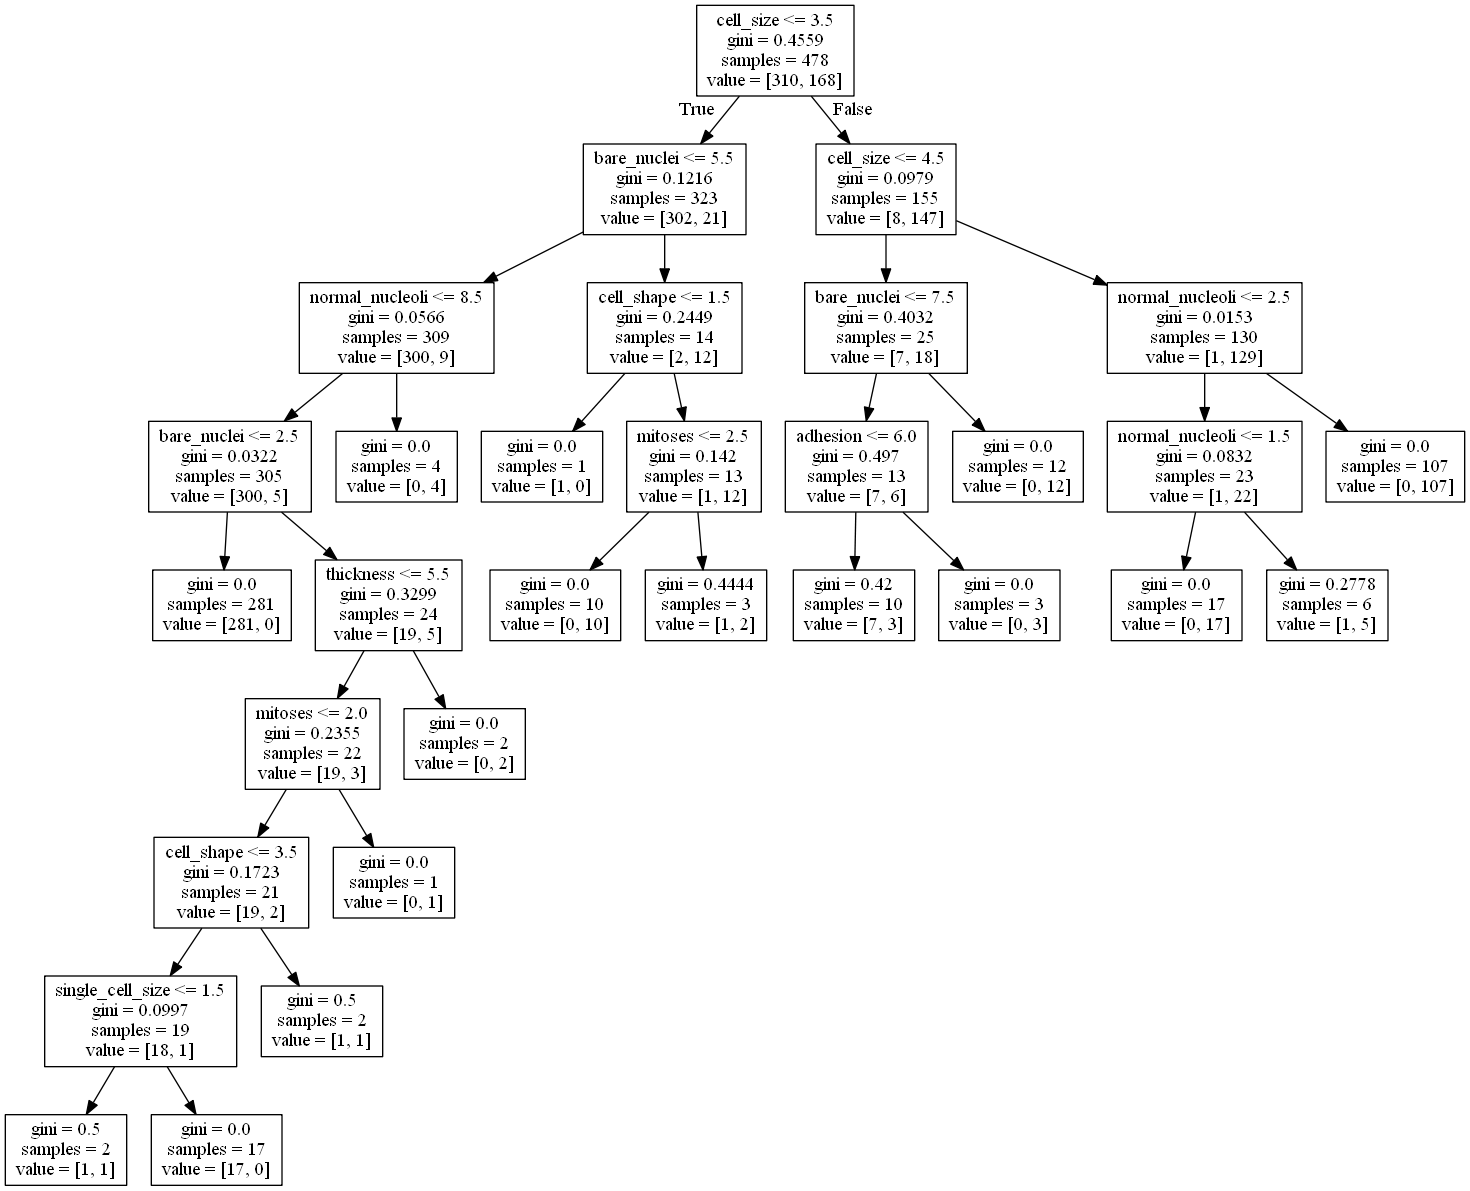

min_split_samples=12


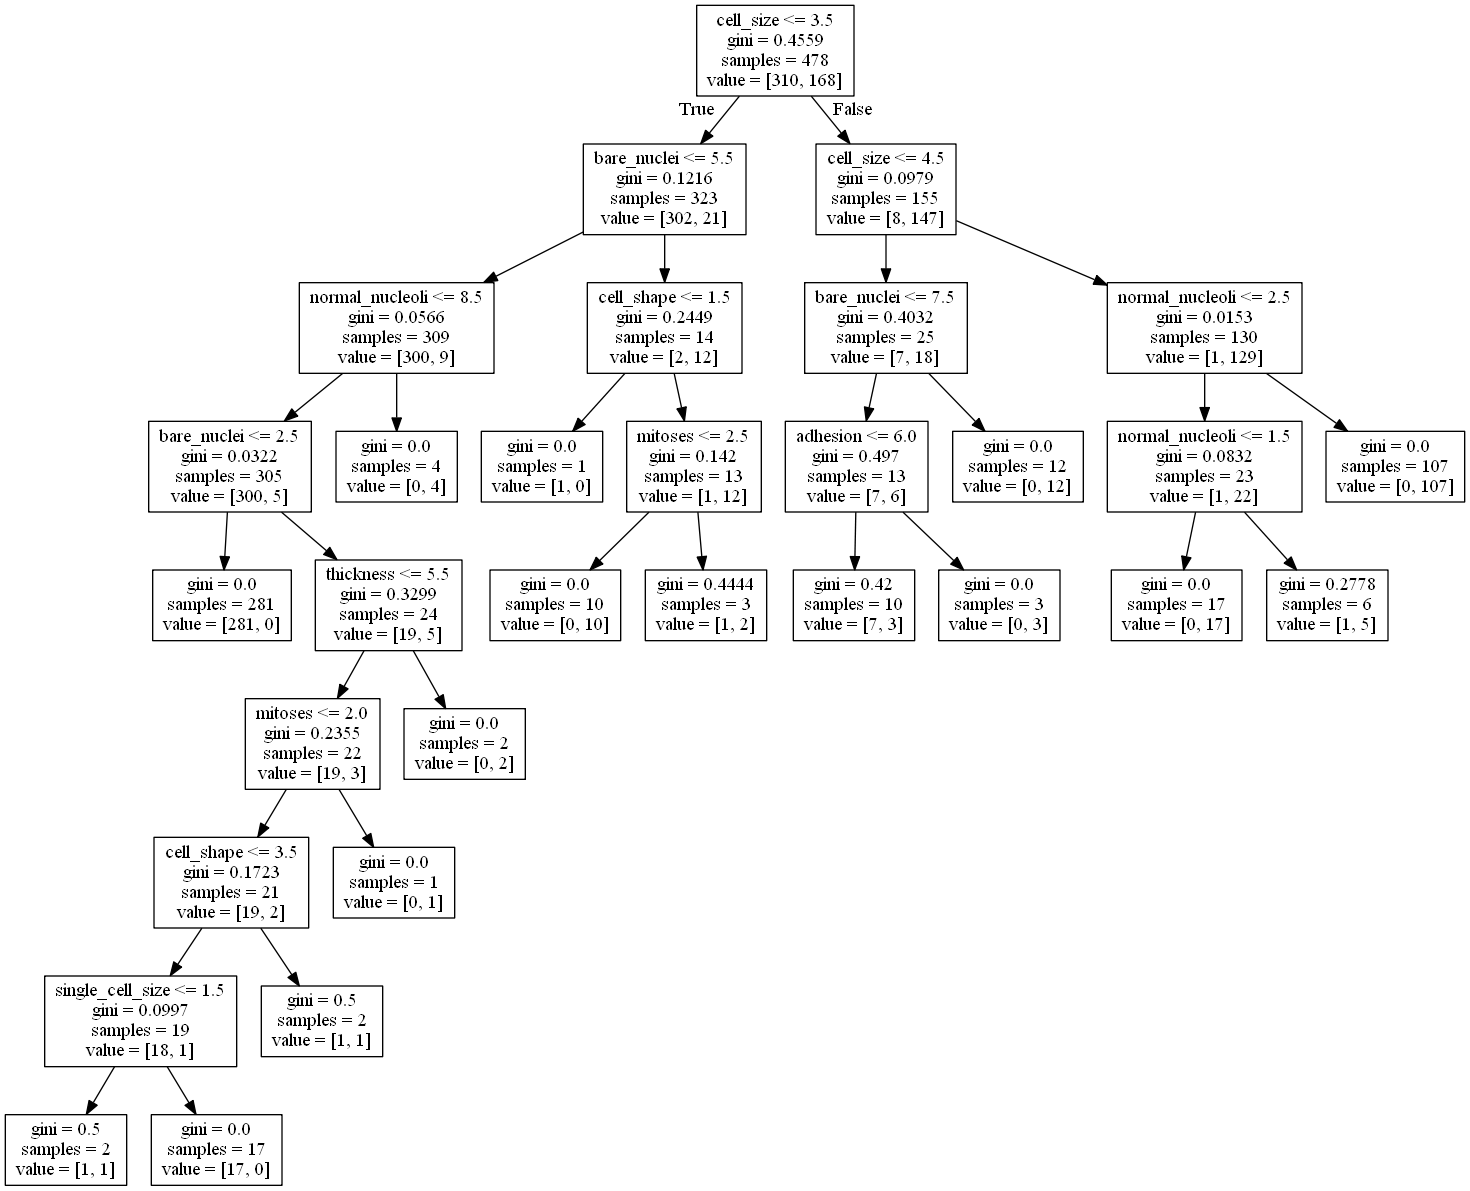

min_split_samples=13


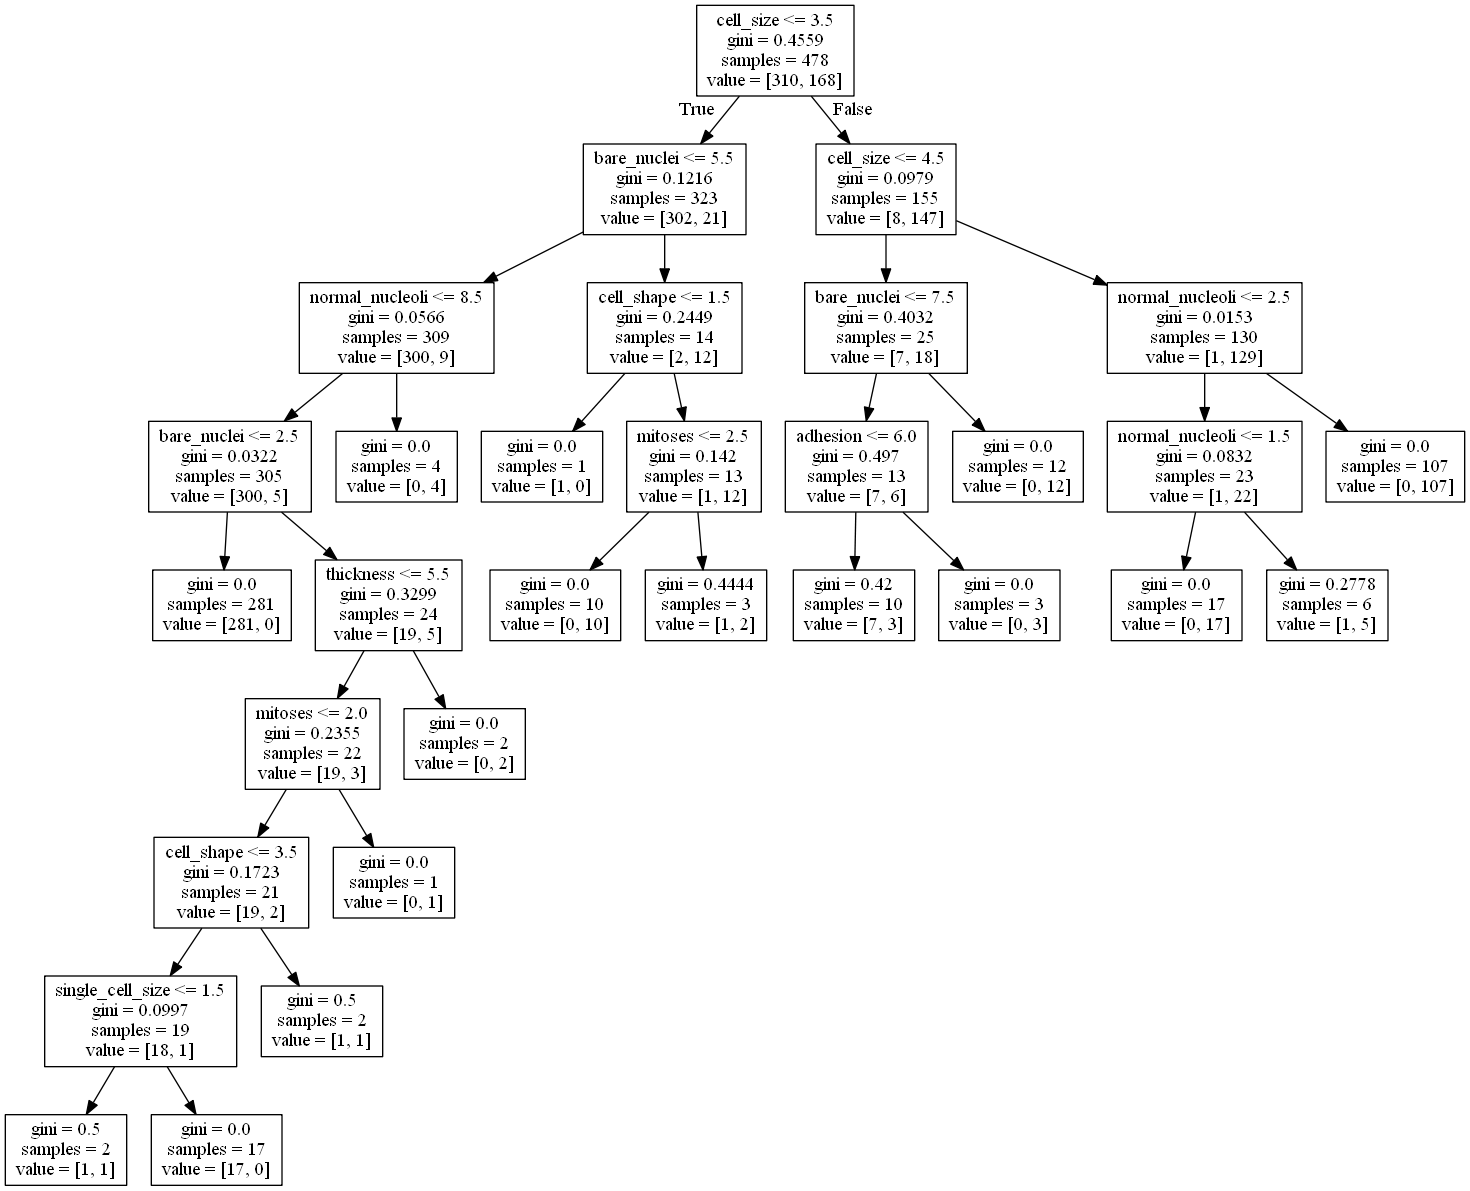

min_split_samples=14


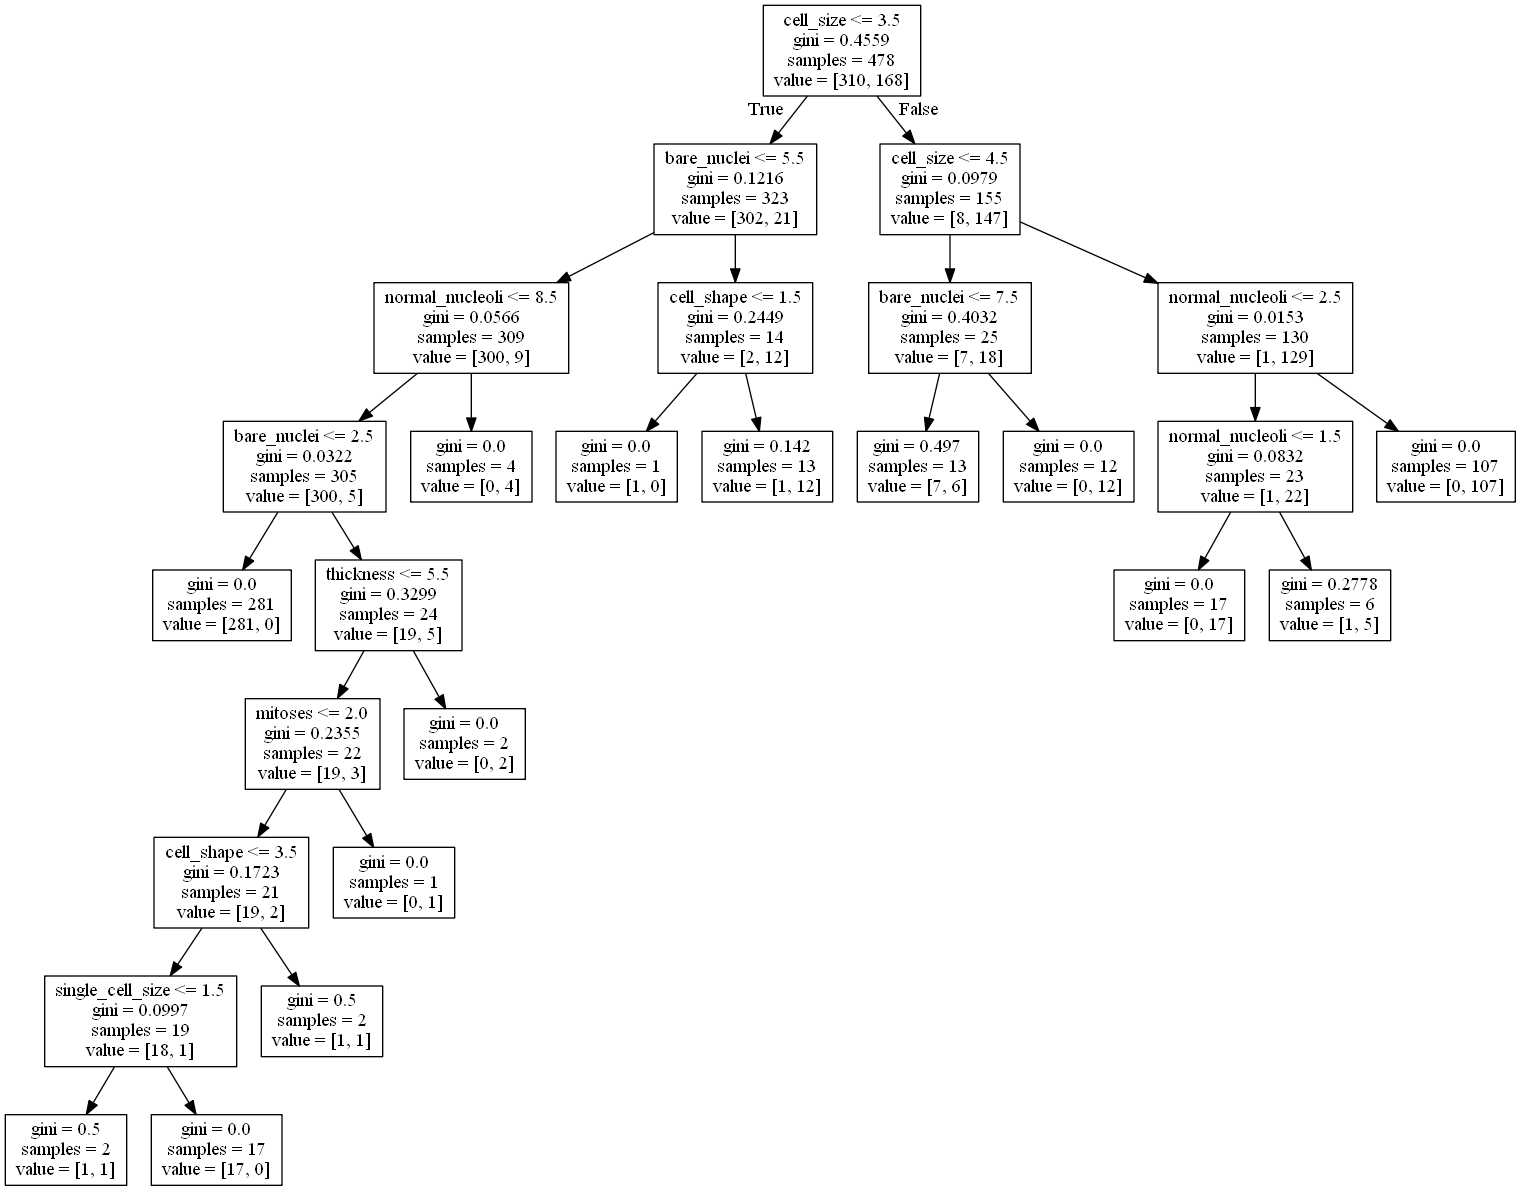

min_split_samples=15


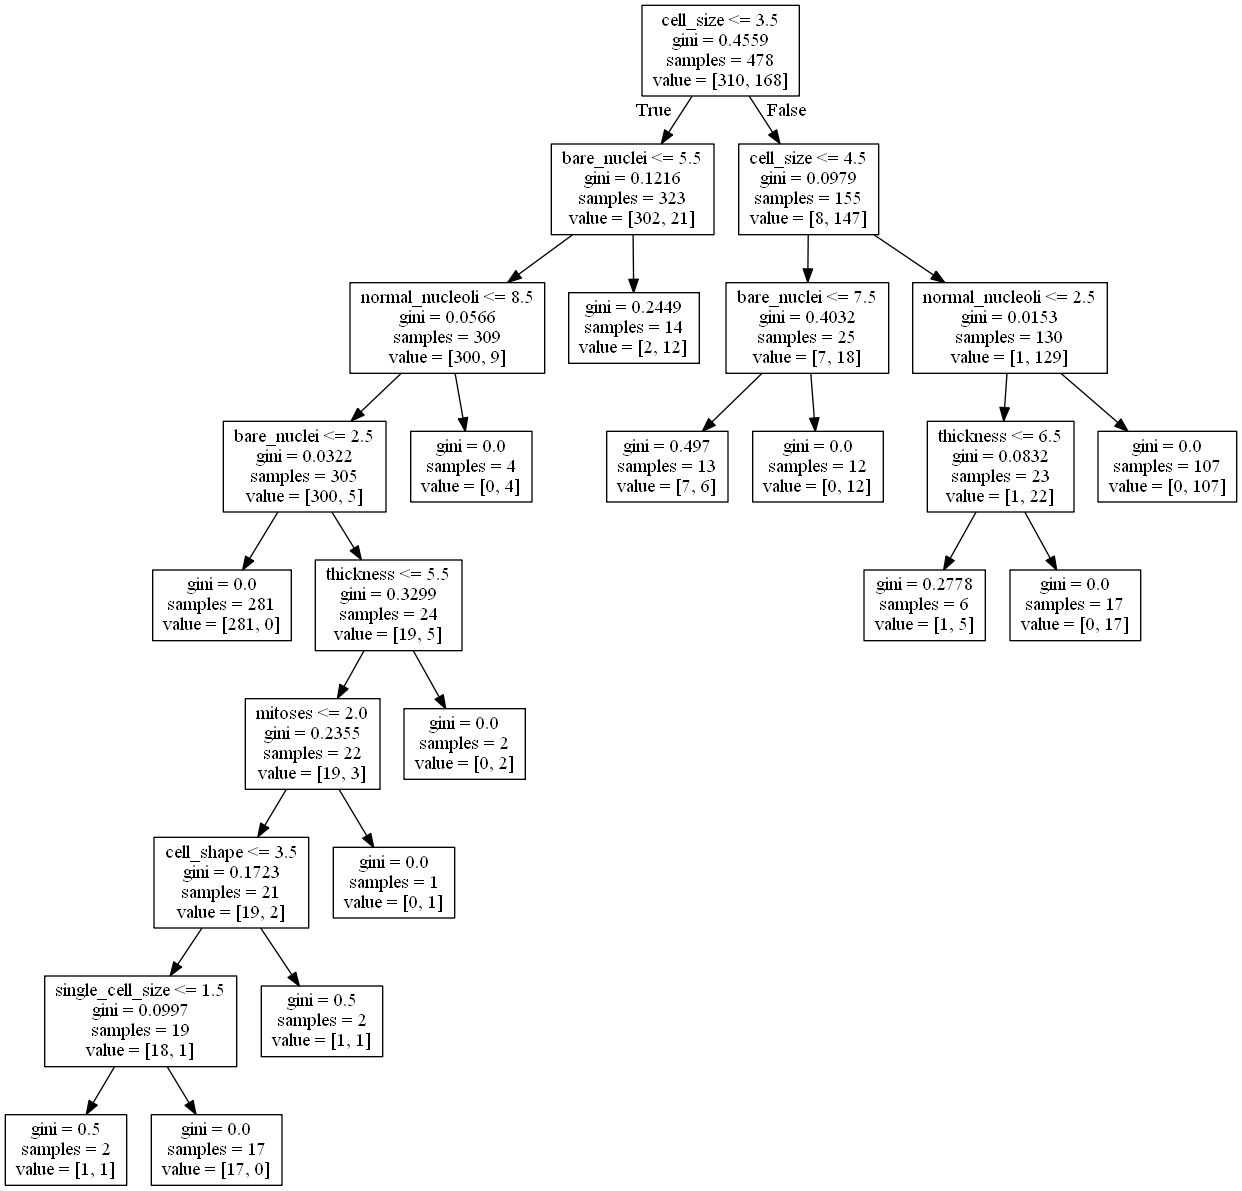

min_split_samples=16


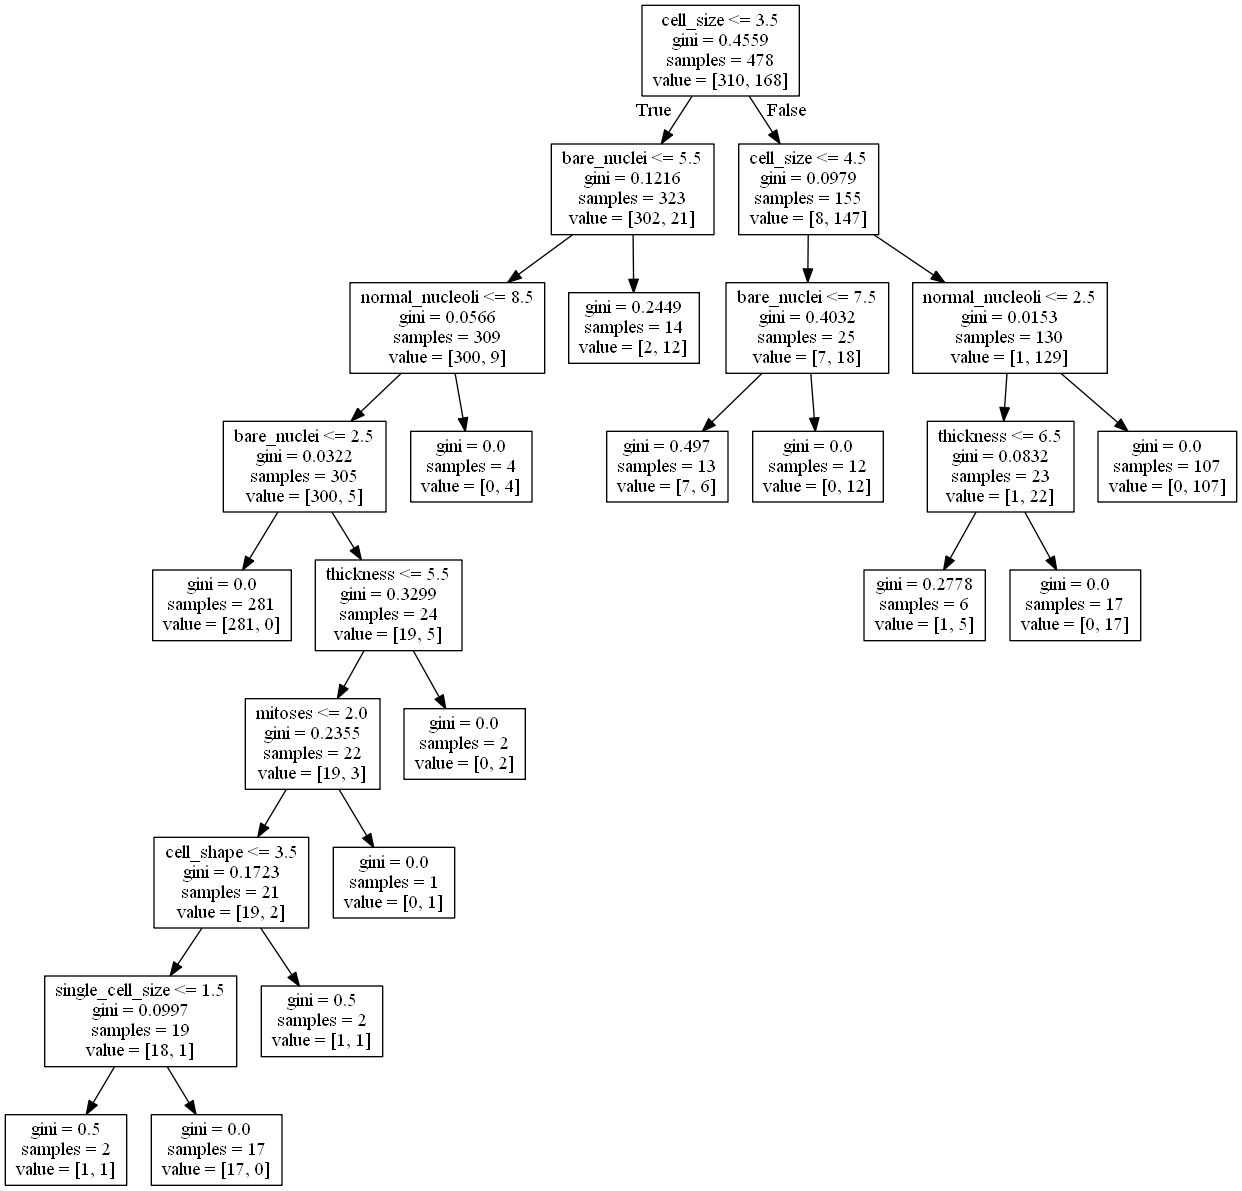

min_split_samples=17


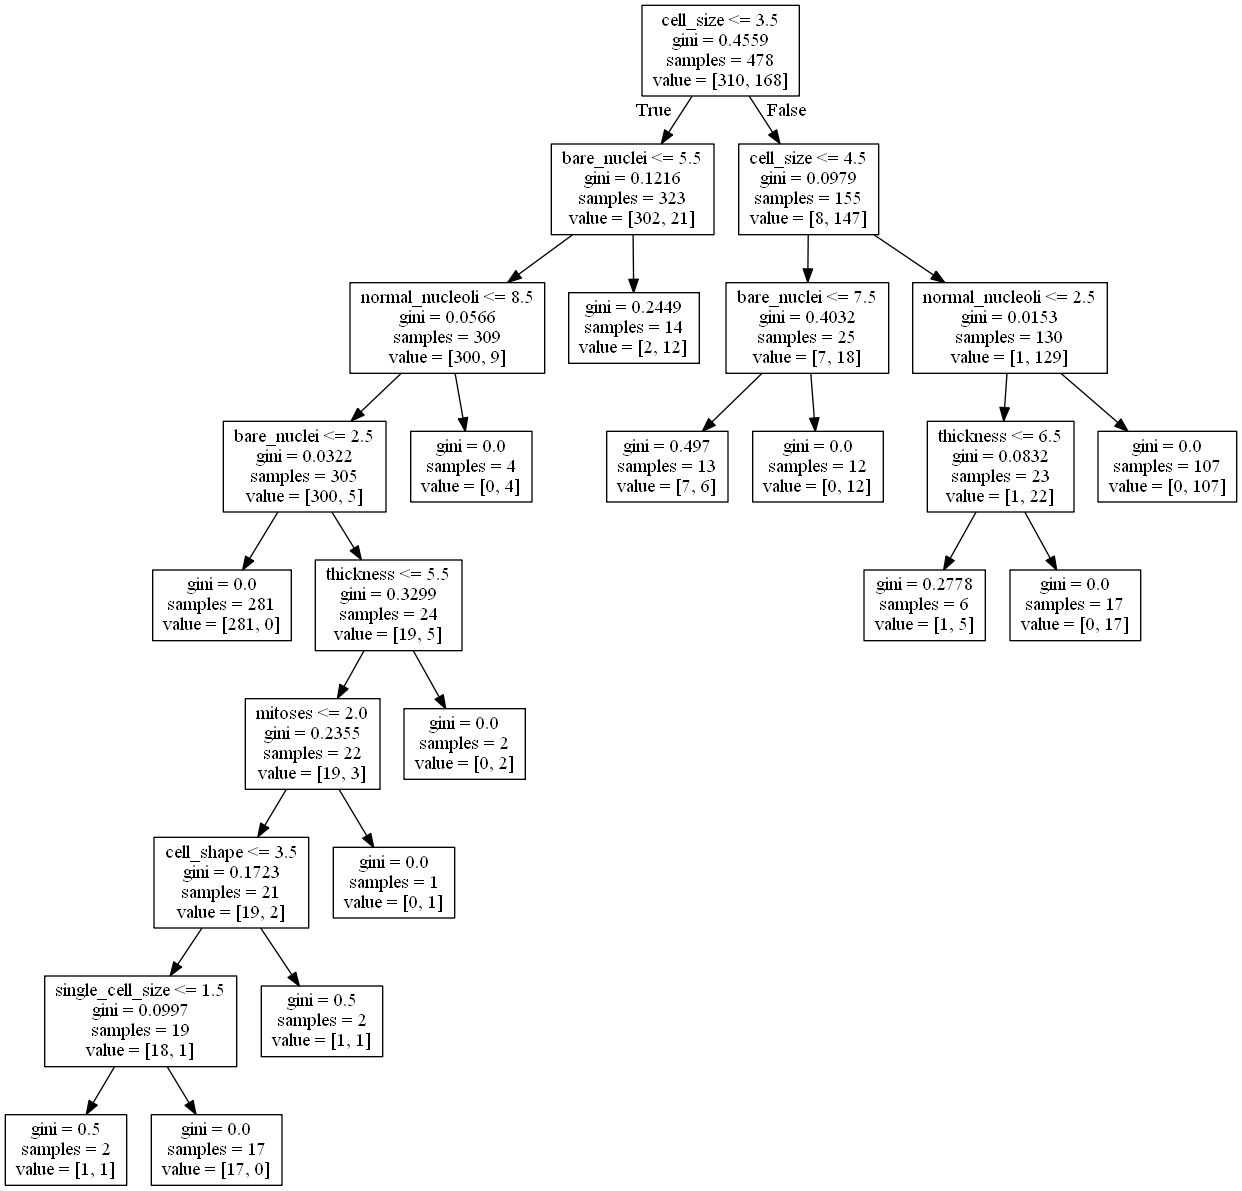

min_split_samples=18


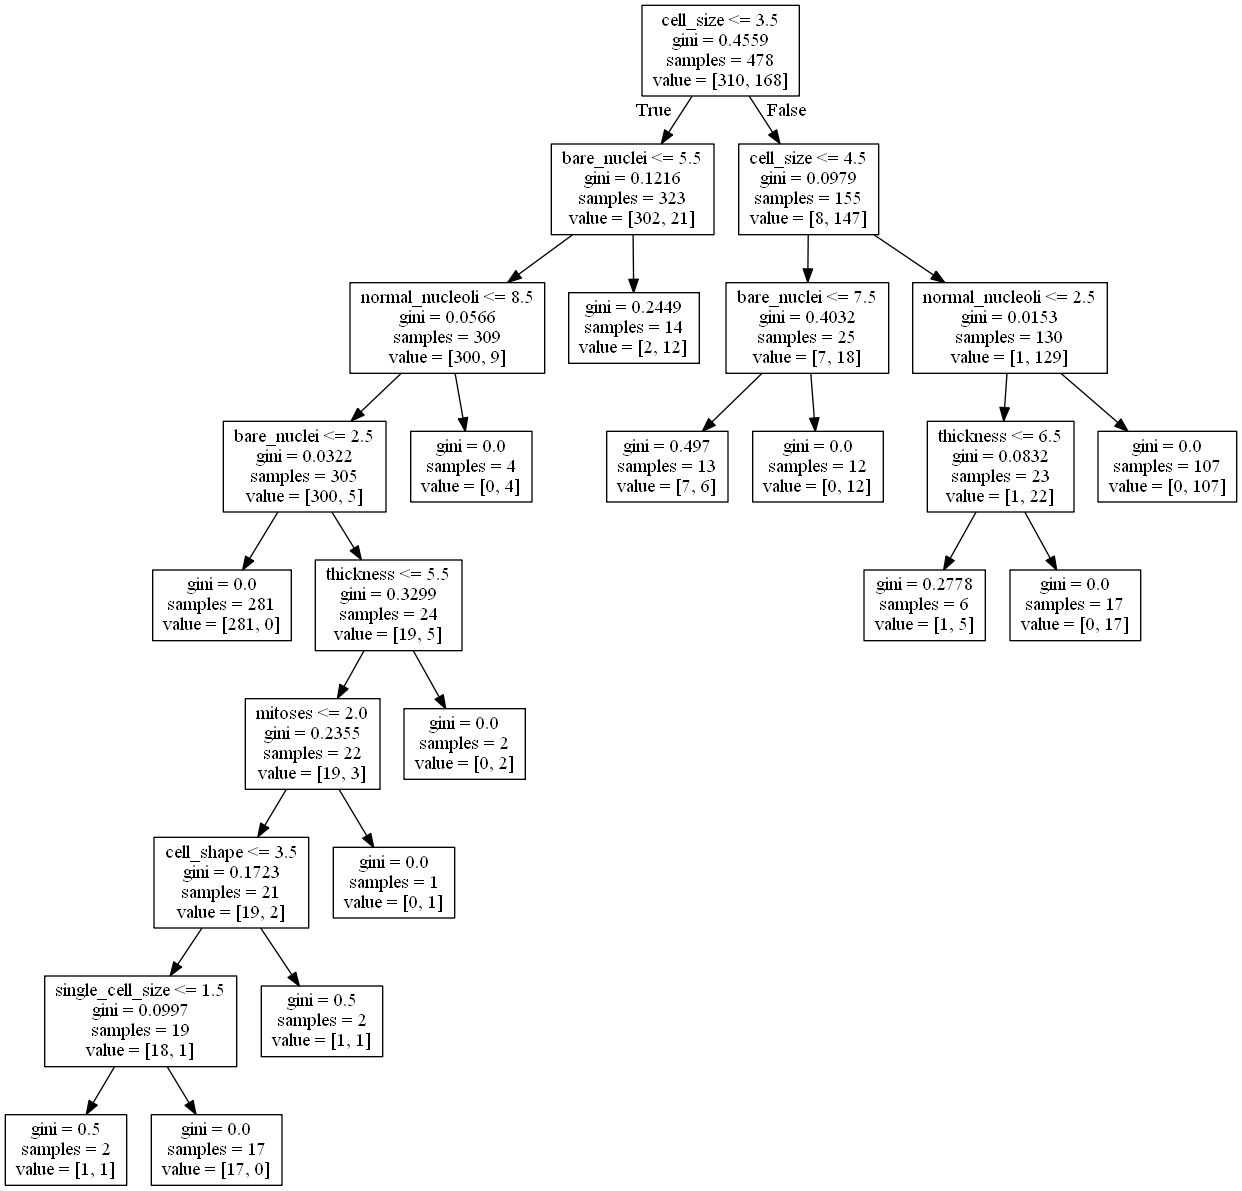

min_split_samples=19


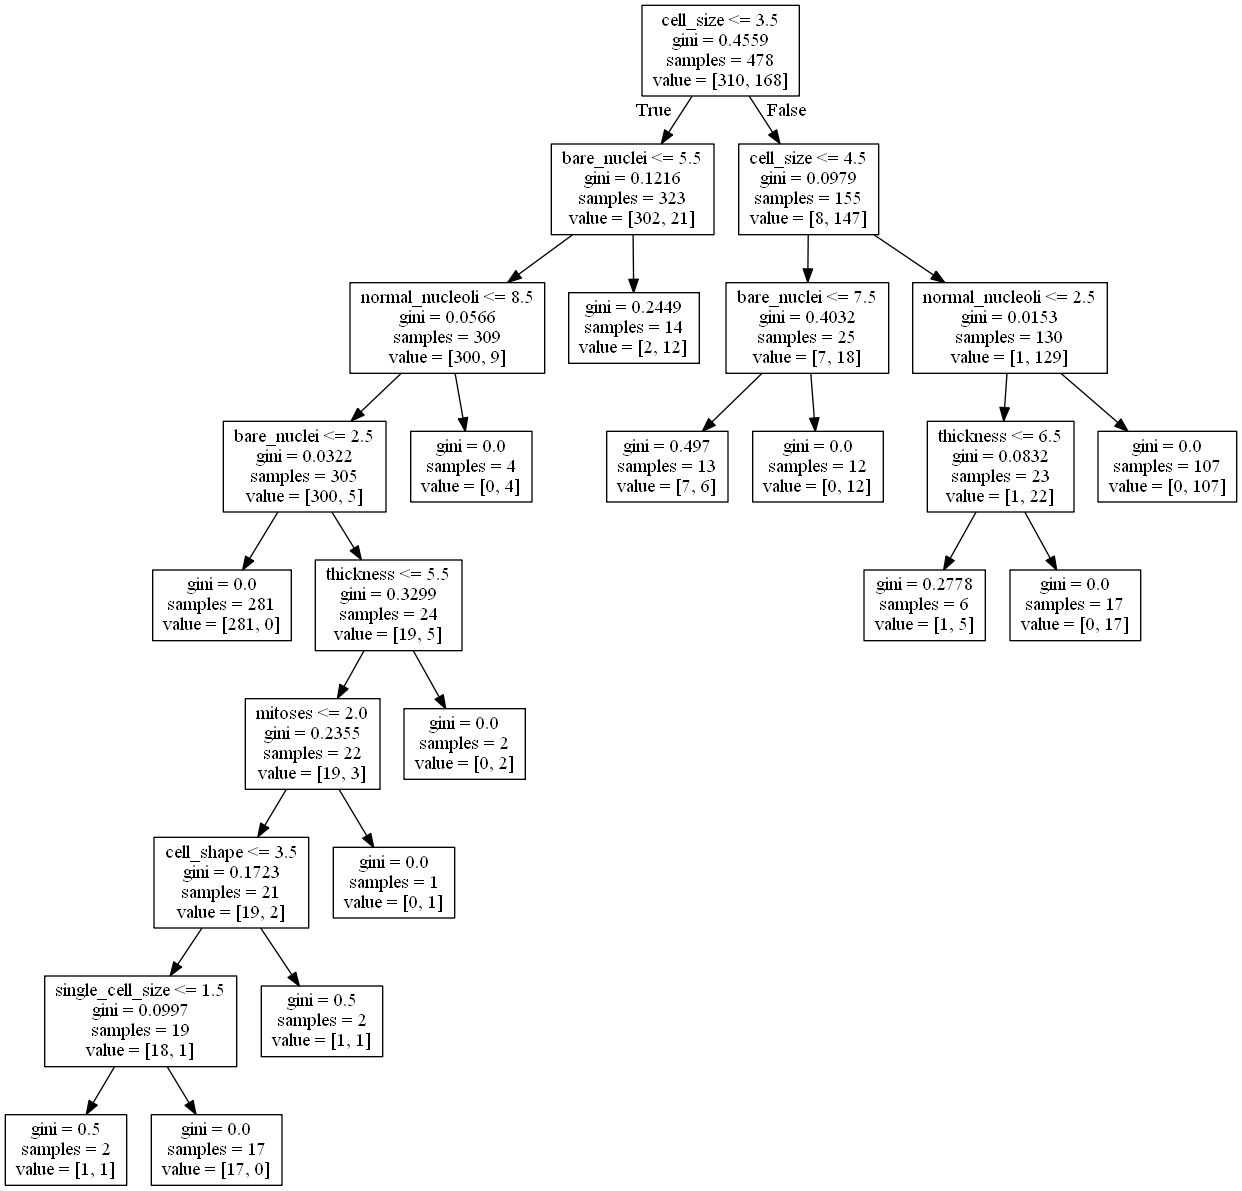

In [18]:
from IPython.display import Image
from IPython.display import display
    
for min_samples in np.arange(2, 20, 1):
    img = 'figures/tree_{}samples.png'.format(min_samples)
    print('min_split_samples={}'.format(min_samples))
    display(Image(img))

By increasing the parameter the tree is less deep, if I had tried out a value of 25 or more I would have eliminated most of the left branch of the tree. Also, by decreasing the number of features I change the way the tree is splitted.

6 - Fit two other classification models of your choice to the data and comment on your results.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
KNN.fit(bcw_train, bcw_target_train)
print(KNN.score(bcw_train, bcw_target_train))
print(KNN.score(bcw_test, bcw_target_test))

0.983263598326
0.960975609756


In [20]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(bcw_train, bcw_target_train)
print(NB.score(bcw_train, bcw_target_train))
print(NB.score(bcw_test, bcw_target_test))

0.960251046025
0.960975609756


Both K-Nearest Neighbors and Gaussian Naive Bayes don't get perfect training accuracy but are less prone to overfitting and get similar if not better results without being tuned; I guess that for this dataset the two classes are easy to separate.

## Random Forests
Decision trees are a very handy method for classification, but their real power comes into play when they are grouped together into a *forest*.  Random Forests essentially work by creating an ensemble of decision trees, and having each tree "vote" on what category a datapoint belongs to.  Intuitively, this may not sound like it would provide much of a benefit, but in practice, random forests tend to be among the most powerful tools available.

1 - Using the same data as above, fit a Random Forest model using the default settings for the hyperparameters in `sklearn`.  How do your results compare to the single decision tree model?

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
forest = RandomForestClassifier(random_state=59)
forest.fit(bcw_train, bcw_target_train)
print(forest.score(bcw_train, bcw_target_train))
print(forest.score(bcw_test, bcw_target_test))

0.995815899582
0.956097560976


There is less overfitting and the testing accuracy is 1% better.

2 - Now try different values of the `max_features` parameter and report the training and testing errors.  Comment on your results.

In [23]:
for n_features in np.arange(1, 10):
    forest.set_params(max_features=n_features)
    forest.fit(bcw_train, bcw_target_train)
    print('Training accuracy for {} features: {}'.format(n_features, forest.score(bcw_train, bcw_target_train)))
    print('Testing accuracy for {} features: {}'.format(n_features, forest.score(bcw_test, bcw_target_test)))
    print('\n')

Training accuracy for 1 features: 0.99581589958159
Testing accuracy for 1 features: 0.9463414634146341


Training accuracy for 2 features: 0.9937238493723849
Testing accuracy for 2 features: 0.975609756097561


Training accuracy for 3 features: 0.99581589958159
Testing accuracy for 3 features: 0.9560975609756097


Training accuracy for 4 features: 0.997907949790795
Testing accuracy for 4 features: 0.9365853658536586


Training accuracy for 5 features: 0.997907949790795
Testing accuracy for 5 features: 0.9512195121951219


Training accuracy for 6 features: 0.997907949790795
Testing accuracy for 6 features: 0.9560975609756097


Training accuracy for 7 features: 0.9916317991631799
Testing accuracy for 7 features: 0.9463414634146341


Training accuracy for 8 features: 0.9916317991631799
Testing accuracy for 8 features: 0.9317073170731708


Training accuracy for 9 features: 0.9916317991631799
Testing accuracy for 9 features: 0.9365853658536586




In general we have better generalization than the tree alone; the best result is for 2 features for which we get 97.5% testing accuracy.

3 - Now try out a few different values of the `n_estimators` parameter.  Comment on your results.

In [24]:
forest = RandomForestClassifier(random_state=59)

for n_estimators in [3, 10, 30, 100, 300, 1000]:
    forest.set_params(n_estimators=n_estimators)
    forest.fit(bcw_train, bcw_target_train)
    print('Training accuracy for {} estimators: {}'.format(n_estimators, forest.score(bcw_train, bcw_target_train)))
    print('Testing accuracy for {} estimators: {}'.format(n_estimators, forest.score(bcw_test, bcw_target_test)))
    print('\n')

Training accuracy for 3 estimators: 0.9937238493723849
Testing accuracy for 3 estimators: 0.9463414634146341


Training accuracy for 10 estimators: 0.99581589958159
Testing accuracy for 10 estimators: 0.9560975609756097


Training accuracy for 30 estimators: 1.0
Testing accuracy for 30 estimators: 0.9609756097560975


Training accuracy for 100 estimators: 1.0
Testing accuracy for 100 estimators: 0.9609756097560975


Training accuracy for 300 estimators: 1.0
Testing accuracy for 300 estimators: 0.9658536585365853


Training accuracy for 1000 estimators: 1.0
Testing accuracy for 1000 estimators: 0.9658536585365853




Increasing the number of estimators we get both better training and testing accuracies, so we don't overfit the model while getting perfect training accuracy.

4 - Now try a few different values for the `min_samples_split` parameter.  Then build a final model and comment on your results.

In [25]:
forest = RandomForestClassifier(random_state=59)

for min_samples in 2**np.arange(1, 10):
    forest.set_params(min_samples_split=min_samples)
    forest.fit(bcw_train, bcw_target_train)
    print('Training accuracy for {} samples split: {}'.format(min_samples, forest.score(bcw_train, bcw_target_train)))
    print('Testing accuracy for {} samples split: {}'.format(min_samples, forest.score(bcw_test, bcw_target_test)))
    print('\n')

Training accuracy for 2 samples split: 0.99581589958159
Testing accuracy for 2 samples split: 0.9560975609756097


Training accuracy for 4 samples split: 0.9874476987447699
Testing accuracy for 4 samples split: 0.9658536585365853


Training accuracy for 8 samples split: 0.9790794979079498
Testing accuracy for 8 samples split: 0.9658536585365853


Training accuracy for 16 samples split: 0.9728033472803347
Testing accuracy for 16 samples split: 0.9804878048780488


Training accuracy for 32 samples split: 0.9728033472803347
Testing accuracy for 32 samples split: 0.9609756097560975


Training accuracy for 64 samples split: 0.9748953974895398
Testing accuracy for 64 samples split: 0.9658536585365853


Training accuracy for 128 samples split: 0.9623430962343096
Testing accuracy for 128 samples split: 0.9560975609756097


Training accuracy for 256 samples split: 0.9435146443514645
Testing accuracy for 256 samples split: 0.9414634146341463


Training accuracy for 512 samples split: 0.648535564

It seems that values between 4 and 64 give the better generalization, with the best result for 16.

In [26]:
forest.set_params(min_samples_split=8, n_estimators=300, max_features=2)
forest.fit(bcw_train, bcw_target_train)
print('Training accuracy: {}'.format(forest.score(bcw_train, bcw_target_train)))
print('Testing accuracy: {}'.format(forest.score(bcw_test, bcw_target_test)))

Training accuracy: 0.9832635983263598
Testing accuracy: 0.975609756097561


97.5% is good, it seems to me that the real benefit comes from the choice of the `max_features` parameter though.

5 - Determine the most important three features in your model, and then fit a new model using only those three features.  Comment on your results.

In [27]:
pd.DataFrame(data=forest.feature_importances_,
             index=list(bcw_train.columns),
             columns=['importance']).sort_values(by='importance', ascending=False)

,importance
cell_size,0.214167
cell_shape,0.162288
bare_nuclei,0.160138
single_cell_size,0.139963
chromatin,0.123559
normal_nucleoli,0.080987
adhesion,0.056929
thickness,0.054763
mitoses,0.007206


In [28]:
bcw_train_red = bcw_train.loc[:, ['cell_size', 'cell_shape', 'bare_nuclei']]
bcw_test_red = bcw_test.loc[:, ['cell_size', 'cell_shape', 'bare_nuclei']]

In [29]:
forest = RandomForestClassifier(random_state=59)
forest.fit(bcw_train_red, bcw_target_train)
print(forest.score(bcw_train_red, bcw_target_train))
print(forest.score(bcw_test_red, bcw_target_test))

0.985355648536
0.956097560976


The result is slightly worse on the training set but the same on the testing set. Let's try the best model from before:

In [30]:
forest.set_params(min_samples_split=8, n_estimators=300, max_features=2)
forest.fit(bcw_train_red, bcw_target_train)
print('Training accuracy: {}'.format(forest.score(bcw_train_red, bcw_target_train)))
print('Testing accuracy: {}'.format(forest.score(bcw_test_red, bcw_target_test)))

Training accuracy: 0.9769874476987448
Testing accuracy: 0.9560975609756097


Here the result is worse, but this isn't optimized for this number of features!

6 - Fit two other classification models of your choice to the reduced data and comment on your results, taking into consideration your results in the `Decision Trees` section above.

In [31]:
KNN = KNeighborsClassifier()
KNN.fit(bcw_train_red, bcw_target_train)
print(KNN.score(bcw_train_red, bcw_target_train))
print(KNN.score(bcw_test_red, bcw_target_test))

# previous results:
# 0.983263598326
# 0.960975609756

0.966527196653
0.951219512195


In [32]:
NB = GaussianNB()
NB.fit(bcw_train_red, bcw_target_train)
print(NB.score(bcw_train_red, bcw_target_train))
print(NB.score(bcw_test_red, bcw_target_test))

# previous results:
# 0.960251046025
# 0.960975609756

0.964435146444
0.960975609756


With respect to the full data we get very similar results for Gaussian Naive Bayes and slightly worse for K-Nearest Neighbors, both are very similar to the forest accuracies though.

## Decision Tree and Random Forest Regression
So far we have only used decision trees for classification problems, but, as it turns out, we can also use them for regression problems.  Again, using trees tends to be computationally very expensive, but they are undoubtedly one of the most powerful tools you'll have at your disposal, especially for modeling non-linear data.

1 - Head over to the [Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php), download the [Concrete Compressive Strength Data Set](http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/), put it into a dataframe, and split into training and test sets.  Be sure to familiarize yourself with the data before proceeding.

In [33]:
concrete = pd.read_excel('http://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls')
concrete.columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                    'coarse_aggregate', 'fine_aggregate', 'age', 'concrete_compressive_strength']

In [34]:
concrete.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [35]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [36]:
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
blast_furnace_slag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
fly_ash,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
coarse_aggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
fine_aggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
concrete_compressive_strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(concrete.iloc[:, :-1], concrete.iloc[:, -1], test_size=0.3, random_state=78)

2 - Fit a multilinear regression model to the data and print the error.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
print(mean_squared_error(lr.predict(Xtrain), ytrain))
print(mean_squared_error(lr.predict(Xtest), ytest))

105.626762698
112.281766745


The model is pretty bad, but as the data description said this relation is highly nonlinear. Also, we haven't normalized the data, which is bad for linear regression.

3 - Fit a decision tree regressor to the data, using the default values for the hyperparameters in `sklearn`, and print the error.  Comment on your results.

In [59]:
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state=68)
treereg.fit(Xtrain, ytrain)
print(mean_squared_error(treereg.predict(Xtrain), ytrain))
print(mean_squared_error(treereg.predict(Xtest), ytest))

0.0472989160893
47.5380658415


With this model the training error is very low but we have bad generalization. Still, the model is way better than linear regressione.

4 - Determine the top three features, and fit a new decision tree regressor to the data.  Comment on your results.

In [60]:
pd.DataFrame(data=treereg.feature_importances_,
             index=list(Xtrain.columns),
             columns=['importance']).sort_values(by='importance', ascending=False)

,importance
cement,0.374141
age,0.317829
blast_furnace_slag,0.113377
water,0.108268
superplasticizer,0.029799
coarse_aggregate,0.028815
fine_aggregate,0.019587
fly_ash,0.008184


In [61]:
Xtrain_red = Xtrain.loc[:, ['cement', 'age', 'blast_furnace_slag']]
Xtest_red = Xtest.loc[:, ['cement', 'age', 'blast_furnace_slag']]

In [62]:
treereg.fit(Xtrain_red, ytrain)
print(mean_squared_error(treereg.predict(Xtrain_red), ytrain))
print(mean_squared_error(treereg.predict(Xtest_red), ytest))

2.02601713685
71.6936692442


The result is worst, I would maybe include also the fourth best feature which has very similar importance as the third to get similar results to the full model:

In [63]:
Xtrain_red = Xtrain.loc[:, ['cement', 'age', 'blast_furnace_slag', 'water']]
Xtest_red = Xtest.loc[:, ['cement', 'age', 'blast_furnace_slag', 'water']]

In [64]:
treereg.fit(Xtrain_red, ytrain)
print(mean_squared_error(treereg.predict(Xtrain_red), ytrain))
print(mean_squared_error(treereg.predict(Xtest_red), ytest))

1.07688867862
52.1744339809


Yep, it's almost the same now.

5 - Tweak the hyperparameters a bit, until you get a fit with a decision tree that you are comfortable with, then print the error and $R^2$ of your final model.  Comment on your results.

In [65]:
scores = []

for min_samples in 2**np.arange(1, 10):
    for max_features in np.arange(1, 9):
        for min_impurity_decrease in (0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30):
            treereg.set_params(min_samples_split=min_samples, max_features=max_features, min_impurity_decrease=min_impurity_decrease)
            treereg.fit(Xtrain, ytrain)
            train_MSE = mean_squared_error(treereg.predict(Xtrain), ytrain)
            test_MSE = mean_squared_error(treereg.predict(Xtest), ytest)
            scores.append([min_samples, max_features, min_impurity_decrease, train_MSE, test_MSE])

scores_df = pd.DataFrame(data=scores, columns=['min_samples', 'max_features', 'min_impurity_decrease', 'train_MSE', 'test_MSE'])

In [66]:
scores_df.sort_values(by='test_MSE')

,min_samples,max_features,min_impurity_decrease,train_MSE,test_MSE
60,2,7,0.001,0.097601,43.659474
32,2,4,0.010,1.561799,43.777403
61,2,7,0.003,0.211171,44.605638
71,2,8,0.003,0.230356,45.889988
151,4,8,0.003,1.830092,46.409812
152,4,8,0.010,2.124584,46.514719
221,8,7,0.003,8.710916,46.631963
130,4,6,0.001,2.621187,47.734303
113,4,4,0.030,5.471112,48.012985
201,8,5,0.003,8.403215,48.071857


In [53]:
from sklearn.metrics import r2_score

In [67]:
treereg.set_params(min_samples_split=2, max_features=7, min_impurity_decrease=0.001)
treereg.fit(Xtrain, ytrain)
print('Training MSE: {}'.format(mean_squared_error(treereg.predict(Xtrain), ytrain)))
print('Testing MSE: {}'.format(mean_squared_error(treereg.predict(Xtest), ytest)))
print('Training R^2: {}'.format(r2_score(treereg.predict(Xtrain), ytrain)))
print('Testing R^2: {}'.format(r2_score(treereg.predict(Xtest), ytest)))
# R^2 and model.score are the same in this case!

Training MSE: 0.09760097128377535
Testing MSE: 43.659474406270945
Training R^2: 0.9996634471752562
Testing R^2: 0.8238521100402227


6 - Fit a polynomial regression model to the data and print the error.  Comment on your results.

In [82]:
from sklearn.preprocessing import PolynomialFeatures

quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
quartic = PolynomialFeatures(degree=4)

Xtrain2 = quadratic.fit_transform(Xtrain)
Xtest2 = quadratic.fit_transform(Xtest)
Xtrain3 = cubic.fit_transform(Xtrain)
Xtest3 = cubic.fit_transform(Xtest)
Xtrain4 = quartic.fit_transform(Xtrain)
Xtest4 = quartic.fit_transform(Xtest)

In [83]:
lr.fit(Xtrain2, ytrain)
print('Poly of degree 2, training: {}'.format(mean_squared_error(lr.predict(Xtrain2), ytrain)))
print('Poly of degree 2, testing: {}'.format(mean_squared_error(lr.predict(Xtest2), ytest)))

lr.fit(Xtrain3, ytrain)
print('Poly of degree 3, training: {}'.format(mean_squared_error(lr.predict(Xtrain3), ytrain)))
print('Poly of degree 3, testing: {}'.format(mean_squared_error(lr.predict(Xtest3), ytest)))

lr.fit(Xtrain4, ytrain)
print('Poly of degree 4, training: {}'.format(mean_squared_error(lr.predict(Xtrain4), ytrain)))
print('Poly of degree 4, testing: {}'.format(mean_squared_error(lr.predict(Xtest4), ytest)))

Poly of degree 2, training: 53.21344378765793
Poly of degree 2, testing: 68.3780764650379
Poly of degree 3, training: 27.14188882608678
Poly of degree 3, testing: 58.34844809846433
Poly of degree 4, training: 74.23849084236245
Poly of degree 4, testing: 11155.410870626754


We get better generalization for degree 2 and 3 but the result is still worst than the decision tree. For degree 4 we get a lot of overfitting.

7 - Fit a random forest regressor to the data, using the default values for the hyperparameters in `sklearn`, and print the error.  Comment on your results.

In [69]:
from sklearn.ensemble import RandomForestRegressor

forestreg = RandomForestRegressor(random_state=91)
forestreg.fit(Xtrain, ytrain)
print(mean_squared_error(forestreg.predict(Xtrain), ytrain))
print(mean_squared_error(forestreg.predict(Xtest), ytest))

5.91840250844
31.1570891874


The training error is worst (but very good all things considered) but the testing error is way better (better generalization as expected).

8 - Determine the top three features, and fit a new random forest regressor to the data.  Comment on your results.

In [70]:
pd.DataFrame(data=forestreg.feature_importances_,
             index=list(Xtrain.columns),
             columns=['importance']).sort_values(by='importance', ascending=False)

,importance
age,0.348812
cement,0.317501
water,0.096903
blast_furnace_slag,0.082603
superplasticizer,0.073507
fine_aggregate,0.035714
coarse_aggregate,0.025927
fly_ash,0.019033


In [71]:
Xtrain_red = Xtrain.loc[:, ['age', 'cement', 'water']]
Xtest_red = Xtest.loc[:, ['age', 'cement', 'water']]

In [74]:
forestreg.fit(Xtrain_red, ytrain)
print(mean_squared_error(forestreg.predict(Xtrain_red), ytrain))
print(mean_squared_error(forestreg.predict(Xtest_red), ytest))

11.3151381863
56.554040365


Again the result is worst, but using the top four features it gets closer to the full model:

In [75]:
Xtrain_red = Xtrain.loc[:, ['age', 'cement', 'water', 'blast_furnace_slag']]
Xtest_red = Xtest.loc[:, ['age', 'cement', 'water', 'blast_furnace_slag']]

In [76]:
forestreg.fit(Xtrain_red, ytrain)
print(mean_squared_error(forestreg.predict(Xtrain_red), ytrain))
print(mean_squared_error(forestreg.predict(Xtest_red), ytest))

6.34327769824
31.8530119792


9 - Tweak the hyperparameters a bit, until you get a fit with a random forest that you are comfortable with, then print the error and $R^2$ of your final model.  Comment on your results.

In [79]:
forestreg.set_params(n_jobs=-1)
forest_scores = []

for n_estimators in (10, 30, 100, 300):
    for min_samples in 2**np.arange(1, 8):
        for max_features in np.arange(1, 9):
            for min_impurity_decrease in (0.001, 0.003, 0.01, 0.03, 0.1, 0.3):
                forestreg.set_params(n_estimators=n_estimators, min_samples_split=min_samples, max_features=max_features, min_impurity_decrease=min_impurity_decrease)
                forestreg.fit(Xtrain, ytrain)
                train_MSE = mean_squared_error(forestreg.predict(Xtrain), ytrain)
                test_MSE = mean_squared_error(forestreg.predict(Xtest), ytest)
                forest_scores.append([n_estimators, min_samples, max_features, min_impurity_decrease, train_MSE, test_MSE])
    print('{} estimators done'.format(n_estimators))

forest_scores_df = pd.DataFrame(data=forest_scores, columns=['n_estimators', 'min_samples', 'max_features', 'min_impurity_decrease', 'train_MSE', 'test_MSE'])

10 estimators done
30 estimators done
100 estimators done
300 estimators done


In [80]:
forest_scores_df.sort_values(by='test_MSE')

,n_estimators,min_samples,max_features,min_impurity_decrease,train_MSE,test_MSE
684,100,2,3,0.001,3.707479,25.749699
1020,300,2,3,0.001,3.430176,25.897050
696,100,2,5,0.001,3.468512,26.164080
1032,300,2,5,0.001,3.340047,26.232232
1027,300,2,4,0.003,3.394135,26.305300
1028,300,2,4,0.010,3.684132,26.434957
1026,300,2,4,0.001,3.249728,26.559349
1021,300,2,3,0.003,3.605562,26.691993
1068,300,4,3,0.001,5.886957,26.699807
1022,300,2,3,0.010,3.846487,26.725852


In [85]:
# from solution: both here and in the decision tree changing criterion to MAE produced an improvement
forestreg.set_params(n_estimators=100, min_samples_split=2, max_features=3, min_impurity_decrease=0.001)
forestreg.fit(Xtrain, ytrain)
print('Training MSE: {}'.format(mean_squared_error(forestreg.predict(Xtrain), ytrain)))
print('Testing MSE: {}'.format(mean_squared_error(forestreg.predict(Xtest), ytest)))
print('Training R^2: {}'.format(r2_score(forestreg.predict(Xtrain), ytrain)))
print('Testing R^2: {}'.format(r2_score(forestreg.predict(Xtest), ytest)))

Training MSE: 4.821995613930632
Testing MSE: 27.373452174156235
Training R^2: 0.981138576599212
Testing R^2: 0.857550201116013


We get a fairly good model given the nonlinear data with a testing $R^2$ score of over 0.86. This result is way better than our first linear model and its MSE is almost half of our first regression tree.